<a href="https://colab.research.google.com/github/jianning1/Capstone-Project/blob/master/Bi_LSTM_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Libaries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string
import spacy 
import os
import sys
import numpy as np

nlp = spacy.load('en', disable=['ner', 'parser'])
import nltk
from nltk.stem.snowball import SnowballStemmer
from scipy import stats

from time import time
from collections import defaultdict
import gc
import io
import random

from __future__ import print_function, division
from builtins import range
import os
import sys
import numpy as np
import operator

import nltk
nltk.download('all')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize


import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalAveragePooling1D, Dropout, Conv1D, GRU, Layer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam, SGD
from sklearn.metrics import roc_auc_score
import keras.backend as K
from keras.layers import CuDNNLSTM as LSTM
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras import metrics
from tensorflow.python.keras.metrics import Metric
from tensorflow.keras.utils import plot_model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.utils import shuffle, class_weight

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [1]:
# install tensorflow 2.0
!pip uninstall tensorflow
!pip install tensorflow-gpu==2.1.0

Uninstalling tensorflow-2.2.0rc2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0rc2
     |████████████████████████████████| 421.8MB 17kB/s 
     |████████████████████████████████| 450kB 55kB/s 
     |████████████████████████████████| 3.9MB 29.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=2026985b2a355f699e775d4ec601a934ad7cb39c247525553292abbf73578001
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalli

In [4]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [5]:
# check the availability of GPU
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [6]:
# Mount Google Drive (to save the downloaded files)
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


### GloVe Pretrained Word Embedding loading

In [7]:
# Load GloVe Embeddings
print('Loading GloVe Embeddings.')

glove_embeddings = {}
f = open('/gdrive/My Drive/glove.42B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embeddings[word] = coefs
f.close()

print('Found %s word vectors.' % len(glove_embeddings))


Loading GloVe Embeddings.
Found 1917495 word vectors.


# Import cleaned data

In [0]:
data = pd.read_csv('/gdrive/My Drive/cleaned_data.csv')

In [47]:
data.head(5)

,Unnamed: 0,_unit_id,positivity,relevance,date,texts
0,0,842613455,3.0,1,8/14/91,yield cd fall late week new york yield cert...
1,1,842613456,NaN,0,8/21/07,morning brief white house seek limit child i...
2,2,842613457,NaN,0,11/14/91,banking bill negotiator set compromise plan...
3,3,842613458,NaN,0,6/16/86,manager journal sniff drug abuser quick fix ...
4,4,842613459,3.0,1,10/4/02,currency trading dollar remain tight range a...


# Text Classification

In [0]:
data = data[['texts','relevance']]

## Oversampling
Oversampling the minority by looking for the synonyms of each word in minor class

In [0]:
# use WordNet to find synonyms of each word and oversample the minor class
from nltk.corpus import wordnet 

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word): 
		for l in syn.lemmas(): 
			synonym = l.name()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym) 
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

In [0]:
# minor class data set
df = data[data['relevance']==1]

In [0]:
# function to oversample data
def oversample(wordlist): 
  new_words = wordlist
  for i in range(len(wordlist)):
    for random_word in wordlist[wordlist.index[i]]:
      try:
        synonyms = get_synonyms(random_word)  # find synonyms list of each word
        synonym = random.choice(list(synonyms))  # random select one sysnonym to replace the original word
        new_words[new_words.index[i]] = [synonym if word == random_word else word for word in new_words[new_words.index[i]]]
      except:
        pass
    s = ' '.join(new_words[new_words.index[i]]) # join the list of synonyms to a new sentence
    new_words[new_words.index[i]] = s
  augmented_sentences = pd.DataFrame(columns=['texts','relevance'])
  augmented_sentences['texts'] = new_words
  augmented_sentences['relevance']  = df['relevance']
  return augmented_sentences

In [0]:
# oversample the minor class data twice
sentence = df['texts']
word_list = sentence.str.split()
data_cleaned = data[['texts','relevance']]

random.seed(45)
data_cleaned = data_cleaned.append(oversample(word_list))

random.seed(98)
data_cleaned = data_cleaned.append(oversample(word_list))

In [16]:
dist = data_cleaned.groupby('relevance').count()
dist

,texts
relevance,
0,6571
1,4260


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


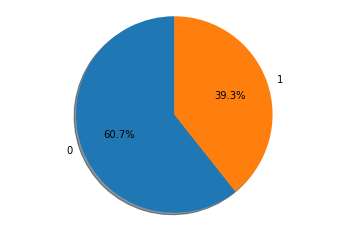

In [17]:

# pie chart of distribution of news relevance
fig1, ax1 = plt.subplots()
sizes = dist.values
label = dist.index.tolist()

ax1.pie(sizes, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')    
plt.show()

In [0]:
# to ramdom shuffle data
data_cleaned = shuffle(data_cleaned)

In [0]:
# reset data index
data_cleaned = data_cleaned.reset_index()

In [20]:
data_cleaned.head(5)

,index,texts,relevance
0,1178,euro rebound find analyst change tune cours...,0
1,3240,future market stock index price record drop ...,0
2,6589,consumer income pass merican consumer ' income...,1
3,5093,citicorp programme bankingcompany towson nion...,1
4,6323,thank thankless job recently privilege work cl...,0


## Baselines - SVM

In [0]:
from sklearn import metrics

texts = data_cleaned['texts'].values
labels = data_cleaned['relevance'].values

# Linear SVC Model:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# 9-split cross validatioon
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 7)

# perform matrix
cvscores_svm = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall'])

for train, test in kfold.split(texts, labels):
# Train both models on the moviereviews.tsv training set:
  text_clf_lsvc.fit(texts[train], labels[train])
  predictions_svm = text_clf_lsvc.predict(texts[test])
  cm_svm = metrics.confusion_matrix(labels[test], predictions_svm)
  cvscores_svm = cvscores_svm.append({'tp': cm_svm[1][1], 'fp': cm_svm[0][1], 'tn': cm_svm[0][0], 'fn': cm_svm[1][0], 
                                    'accuracy': (cm_svm[1][1]+cm_svm[0][0])/(cm_svm[0][0]+cm_svm[0][1]+(cm_svm[1][0]+cm_svm[1][1])),
                                    'precision': (cm_svm[1][1])/((cm_svm[0][1]+cm_svm[1][1])), 
                                    'recall': (cm_svm[1][1])/((cm_svm[1][1]+cm_svm[1][0])), 
                                    }, 
                                   ignore_index= True)

In [22]:
cvscores_svm.mean()

tp           311.800000
fp            45.200000
tn           611.900000
fn           114.200000
accuracy       0.852829
precision      0.873687
recall         0.731925
dtype: float64

## Bi-LSTM

In [0]:
# some configuration
MAX_SEQUENCE_LENGTH = 432   # max sentence length 432 words
EMBEDDING_DIM = 300    # word vector dimension


### Word Embedding Weights

In [24]:
# load in pre-trained word vectors
# shape: MAX_VOCAB_SIZE x word vector dimension
MAX_VOCAB_SIZE = 50000     # how many words will be used from dictionary 

print('Loading word vectors...')
word2vec = glove_embeddings

# load dataset
sentences = data_cleaned['texts'].fillna("DUMMY_VALUE").values

# convert the sentences (strings) into integers
# return a list of the index of every word in every sentence
num_words = MAX_VOCAB_SIZE
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(sentences)   # word counts on unique words, see below

# word2idx: number of unique words with index (Dictionary of word index)
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Loading word vectors...
Found 42893 unique tokens.


In [25]:
# prepare embedding matrix
# use the word and index in word2idx to look for the word vector (numeric)
# embedding_matrix
# size: # of unique words x D
n = 0
uncovered_words = {}
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE,len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = word2vec.get(word)
        #print(embedding_vector)
        if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
            embedding_matrix[i] = embedding_vector
        else:
            n = n + 1
            uncovered_words[n] = word
print('{}, or {:.2%} of total {} unique words are not covered'.format(n, n/len(word2idx), len(word2idx)))

Filling pre-trained embeddings...
8441, or 19.68% of total 42893 unique words are not covered


### Padding

In [26]:
sequences = tokenizer.texts_to_sequences(data_cleaned['texts'].values)
texts = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of test data tensor:', texts.shape)

Shape of test data tensor: (10831, 432)


### Model

#### Learning rate 0.001

##### Bi-LSTM

Building Bi-LSTM model...
Training model...
Train on 8664 samples, validate on 963 samples
Epoch 1/100
8664/8664 [==============================] - 22s 3ms/sample - loss: 0.3728 - tp: 2131.0000 - fp: 62.0000 - tn: 5187.0000 - fn: 1284.0000 - accuracy: 0.8446 - precision: 0.9717 - recall: 0.6240 - auc: 0.8692 - val_loss: 0.3255 - val_tp: 243.0000 - val_fp: 1.0000 - val_tn: 590.0000 - val_fn: 129.0000 - val_accuracy: 0.8650 - val_precision: 0.9959 - val_recall: 0.6532 - val_auc: 0.8991
Epoch 2/100
8664/8664 [==============================] - 12s 1ms/sample - loss: 0.3169 - tp: 2281.0000 - fp: 21.0000 - tn: 5228.0000 - fn: 1134.0000 - accuracy: 0.8667 - precision: 0.9909 - recall: 0.6679 - auc: 0.9049 - val_loss: 0.3147 - val_tp: 246.0000 - val_fp: 1.0000 - val_tn: 590.0000 - val_fn: 126.0000 - val_accuracy: 0.8681 - val_precision: 0.9960 - val_recall: 0.6613 - val_auc: 0.9080
Epoch 3/100
8664/8664 [==============================] - 12s 1ms/sample - loss: 0.3088 - tp: 2313.0000 - fp: 38.0

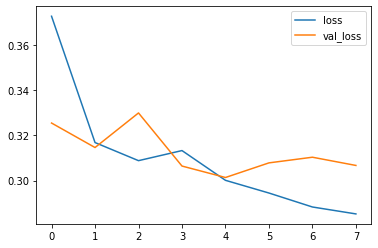

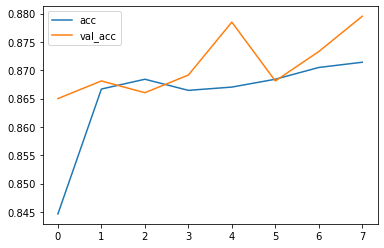

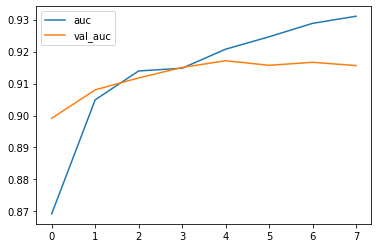

1204/1204 [==============================] - 1s 712us/sample - loss: 0.2856 - tp: 340.0000 - fp: 25.0000 - tn: 706.0000 - fn: 133.0000 - accuracy: 0.8688 - precision: 0.9315 - recall: 0.7188 - auc: 0.9281
Training model...
Train on 8664 samples, validate on 963 samples
Epoch 1/100
8664/8664 [==============================] - 17s 2ms/sample - loss: 0.3689 - tp: 2159.0000 - fp: 26.0000 - tn: 5223.0000 - fn: 1256.0000 - accuracy: 0.8520 - precision: 0.9881 - recall: 0.6322 - auc: 0.8660 - val_loss: 0.3350 - val_tp: 233.0000 - val_fp: 0.0000e+00 - val_tn: 592.0000 - val_fn: 138.0000 - val_accuracy: 0.8567 - val_precision: 1.0000 - val_recall: 0.6280 - val_auc: 0.9103
Epoch 2/100
8664/8664 [==============================] - 12s 1ms/sample - loss: 0.3098 - tp: 2291.0000 - fp: 15.0000 - tn: 5234.0000 - fn: 1124.0000 - accuracy: 0.8685 - precision: 0.9935 - recall: 0.6709 - auc: 0.9102 - val_loss: 0.3095 - val_tp: 239.0000 - val_fp: 0.0000e+00 - val_tn: 592.0000 - val_fn: 132.0000 - val_accura

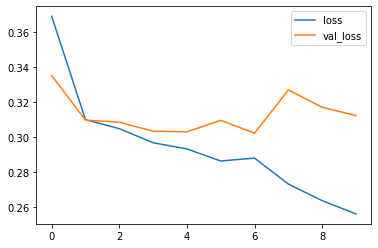

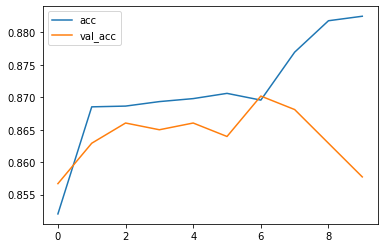

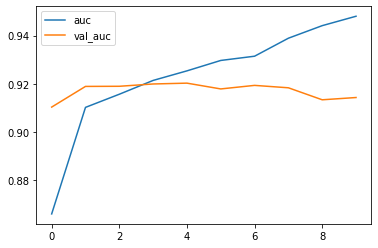

1204/1204 [==============================] - 1s 698us/sample - loss: 0.3148 - tp: 323.0000 - fp: 22.0000 - tn: 708.0000 - fn: 151.0000 - accuracy: 0.8563 - precision: 0.9362 - recall: 0.6814 - auc: 0.9128
Training model...
Train on 8664 samples, validate on 963 samples
Epoch 1/100
8664/8664 [==============================] - 16s 2ms/sample - loss: 0.3657 - tp: 2159.0000 - fp: 52.0000 - tn: 5187.0000 - fn: 1266.0000 - accuracy: 0.8479 - precision: 0.9765 - recall: 0.6304 - auc: 0.8785 - val_loss: 0.3100 - val_tp: 239.0000 - val_fp: 0.0000e+00 - val_tn: 602.0000 - val_fn: 122.0000 - val_accuracy: 0.8733 - val_precision: 1.0000 - val_recall: 0.6620 - val_auc: 0.9093
Epoch 2/100
8664/8664 [==============================] - 12s 1ms/sample - loss: 0.3285 - tp: 2254.0000 - fp: 60.0000 - tn: 5179.0000 - fn: 1171.0000 - accuracy: 0.8579 - precision: 0.9741 - recall: 0.6581 - auc: 0.9044 - val_loss: 0.3083 - val_tp: 253.0000 - val_fp: 13.0000 - val_tn: 589.0000 - val_fn: 108.0000 - val_accuracy:

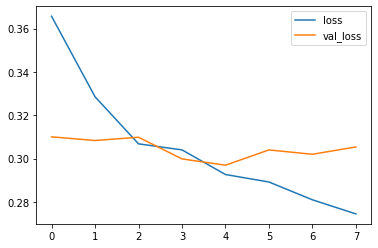

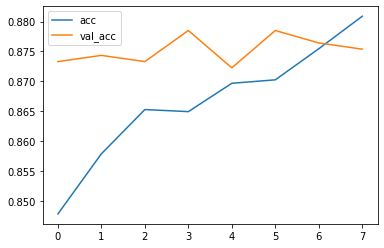

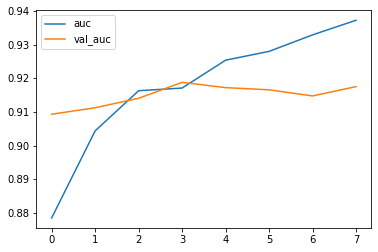

1204/1204 [==============================] - 1s 706us/sample - loss: 0.3095 - tp: 320.0000 - fp: 5.0000 - tn: 725.0000 - fn: 154.0000 - accuracy: 0.8679 - precision: 0.9846 - recall: 0.6751 - auc: 0.9104
Training model...
Train on 8664 samples, validate on 963 samples
Epoch 1/100
8664/8664 [==============================] - 16s 2ms/sample - loss: 0.3716 - tp: 2137.0000 - fp: 38.0000 - tn: 5203.0000 - fn: 1286.0000 - accuracy: 0.8472 - precision: 0.9825 - recall: 0.6243 - auc: 0.8713 - val_loss: 0.4000 - val_tp: 166.0000 - val_fp: 0.0000e+00 - val_tn: 600.0000 - val_fn: 197.0000 - val_accuracy: 0.7954 - val_precision: 1.0000 - val_recall: 0.4573 - val_auc: 0.8939
Epoch 2/100
8664/8664 [==============================] - 12s 1ms/sample - loss: 0.3176 - tp: 2267.0000 - fp: 11.0000 - tn: 5230.0000 - fn: 1156.0000 - accuracy: 0.8653 - precision: 0.9952 - recall: 0.6623 - auc: 0.9066 - val_loss: 0.3189 - val_tp: 233.0000 - val_fp: 1.0000 - val_tn: 599.0000 - val_fn: 130.0000 - val_accuracy: 0

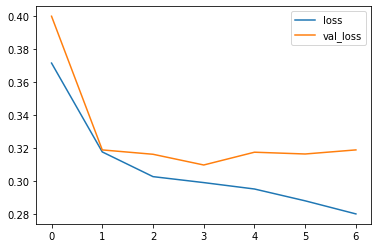

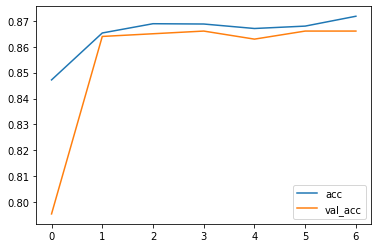

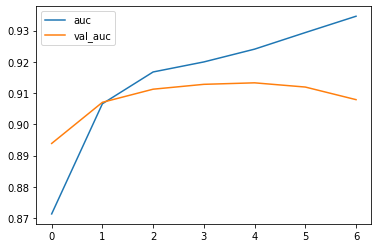

1204/1204 [==============================] - 1s 688us/sample - loss: 0.3017 - tp: 316.0000 - fp: 1.0000 - tn: 729.0000 - fn: 158.0000 - accuracy: 0.8679 - precision: 0.9968 - recall: 0.6667 - auc: 0.9198
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 17s 2ms/sample - loss: 0.3955 - tp: 2124.0000 - fp: 134.0000 - tn: 5113.0000 - fn: 1294.0000 - accuracy: 0.8352 - precision: 0.9407 - recall: 0.6214 - auc: 0.8569 - val_loss: 0.3646 - val_tp: 242.0000 - val_fp: 0.0000e+00 - val_tn: 594.0000 - val_fn: 127.0000 - val_accuracy: 0.8681 - val_precision: 1.0000 - val_recall: 0.6558 - val_auc: 0.8566
Epoch 2/100
8665/8665 [==============================] - 11s 1ms/sample - loss: 0.3300 - tp: 2292.0000 - fp: 31.0000 - tn: 5216.0000 - fn: 1126.0000 - accuracy: 0.8665 - precision: 0.9867 - recall: 0.6706 - auc: 0.8936 - val_loss: 0.3158 - val_tp: 248.0000 - val_fp: 6.0000 - val_tn: 588.0000 - val_fn: 121.0000 - val_accuracy: 

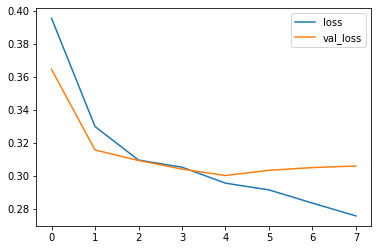

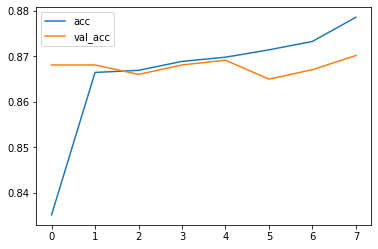

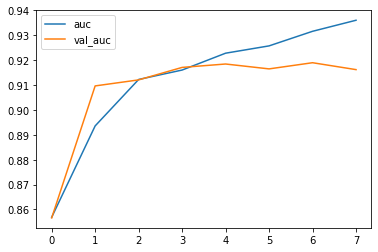

1203/1203 [==============================] - 1s 710us/sample - loss: 0.3097 - tp: 343.0000 - fp: 34.0000 - tn: 696.0000 - fn: 130.0000 - accuracy: 0.8637 - precision: 0.9098 - recall: 0.7252 - auc: 0.9138
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 16s 2ms/sample - loss: 0.3932 - tp: 2156.0000 - fp: 107.0000 - tn: 5139.0000 - fn: 1263.0000 - accuracy: 0.8419 - precision: 0.9527 - recall: 0.6306 - auc: 0.8557 - val_loss: 0.3357 - val_tp: 244.0000 - val_fp: 3.0000 - val_tn: 592.0000 - val_fn: 124.0000 - val_accuracy: 0.8681 - val_precision: 0.9879 - val_recall: 0.6630 - val_auc: 0.8941
Epoch 2/100
8665/8665 [==============================] - 12s 1ms/sample - loss: 0.3263 - tp: 2296.0000 - fp: 41.0000 - tn: 5205.0000 - fn: 1123.0000 - accuracy: 0.8657 - precision: 0.9825 - recall: 0.6715 - auc: 0.9046 - val_loss: 0.3228 - val_tp: 243.0000 - val_fp: 0.0000e+00 - val_tn: 595.0000 - val_fn: 125.0000 - val_accuracy:

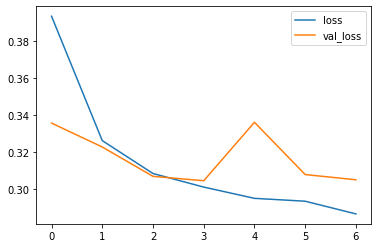

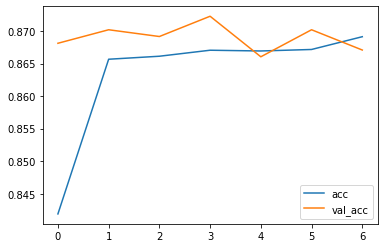

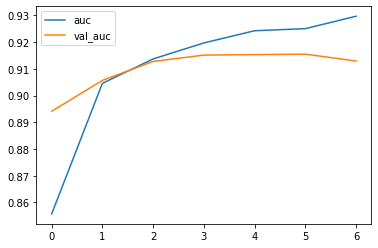

1203/1203 [==============================] - 1s 697us/sample - loss: 0.3076 - tp: 336.0000 - fp: 12.0000 - tn: 718.0000 - fn: 137.0000 - accuracy: 0.8761 - precision: 0.9655 - recall: 0.7104 - auc: 0.9114
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 16s 2ms/sample - loss: 0.3666 - tp: 2148.0000 - fp: 37.0000 - tn: 5210.0000 - fn: 1270.0000 - accuracy: 0.8492 - precision: 0.9831 - recall: 0.6284 - auc: 0.8738 - val_loss: 0.3137 - val_tp: 244.0000 - val_fp: 1.0000 - val_tn: 593.0000 - val_fn: 125.0000 - val_accuracy: 0.8692 - val_precision: 0.9959 - val_recall: 0.6612 - val_auc: 0.9130
Epoch 2/100
8665/8665 [==============================] - 12s 1ms/sample - loss: 0.3116 - tp: 2284.0000 - fp: 23.0000 - tn: 5224.0000 - fn: 1134.0000 - accuracy: 0.8665 - precision: 0.9900 - recall: 0.6682 - auc: 0.9104 - val_loss: 0.3004 - val_tp: 245.0000 - val_fp: 3.0000 - val_tn: 591.0000 - val_fn: 124.0000 - val_accuracy: 0.86

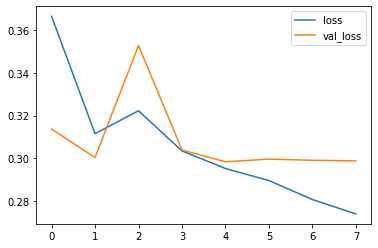

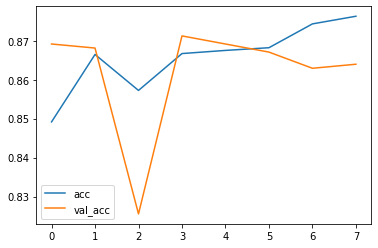

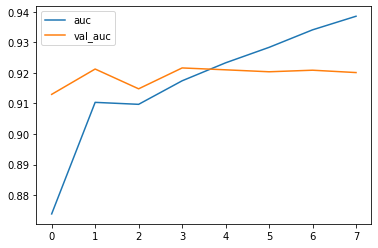

1203/1203 [==============================] - 1s 691us/sample - loss: 0.3067 - tp: 328.0000 - fp: 14.0000 - tn: 716.0000 - fn: 145.0000 - accuracy: 0.8678 - precision: 0.9591 - recall: 0.6934 - auc: 0.9148
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 18s 2ms/sample - loss: 0.3775 - tp: 2195.0000 - fp: 90.0000 - tn: 5142.0000 - fn: 1238.0000 - accuracy: 0.8467 - precision: 0.9606 - recall: 0.6394 - auc: 0.8522 - val_loss: 0.3385 - val_tp: 231.0000 - val_fp: 4.0000 - val_tn: 605.0000 - val_fn: 123.0000 - val_accuracy: 0.8681 - val_precision: 0.9830 - val_recall: 0.6525 - val_auc: 0.8814
Epoch 2/100
8665/8665 [==============================] - 12s 1ms/sample - loss: 0.3203 - tp: 2277.0000 - fp: 6.0000 - tn: 5226.0000 - fn: 1156.0000 - accuracy: 0.8659 - precision: 0.9974 - recall: 0.6633 - auc: 0.9036 - val_loss: 0.3148 - val_tp: 230.0000 - val_fp: 1.0000 - val_tn: 608.0000 - val_fn: 124.0000 - val_accuracy: 0.870

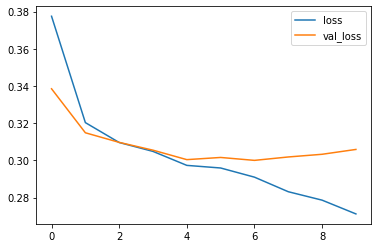

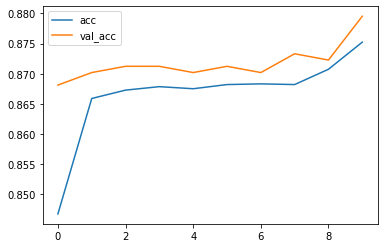

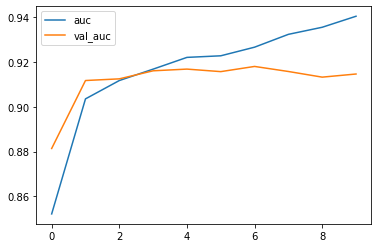

1203/1203 [==============================] - 1s 705us/sample - loss: 0.2928 - tp: 323.0000 - fp: 6.0000 - tn: 724.0000 - fn: 150.0000 - accuracy: 0.8703 - precision: 0.9818 - recall: 0.6829 - auc: 0.9305
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 17s 2ms/sample - loss: 0.3732 - tp: 2152.0000 - fp: 49.0000 - tn: 5199.0000 - fn: 1265.0000 - accuracy: 0.8484 - precision: 0.9777 - recall: 0.6298 - auc: 0.8701 - val_loss: 0.3371 - val_tp: 235.0000 - val_fp: 1.0000 - val_tn: 592.0000 - val_fn: 135.0000 - val_accuracy: 0.8588 - val_precision: 0.9958 - val_recall: 0.6351 - val_auc: 0.8987
Epoch 2/100
8665/8665 [==============================] - 12s 1ms/sample - loss: 0.3099 - tp: 2307.0000 - fp: 27.0000 - tn: 5221.0000 - fn: 1110.0000 - accuracy: 0.8688 - precision: 0.9884 - recall: 0.6752 - auc: 0.9105 - val_loss: 0.3116 - val_tp: 241.0000 - val_fp: 0.0000e+00 - val_tn: 593.0000 - val_fn: 129.0000 - val_accuracy: 0

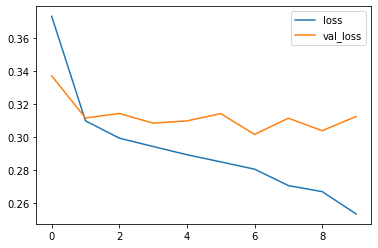

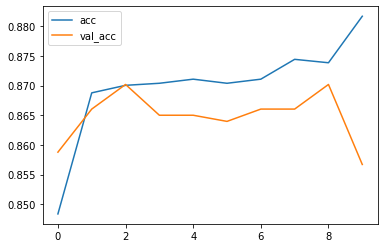

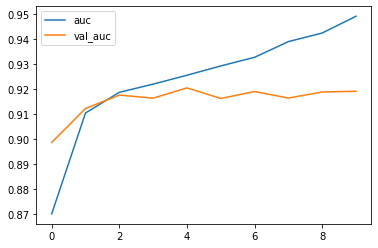

1203/1203 [==============================] - 1s 707us/sample - loss: 0.3167 - tp: 296.0000 - fp: 0.0000e+00 - tn: 730.0000 - fn: 177.0000 - accuracy: 0.8529 - precision: 1.0000 - recall: 0.6258 - auc: 0.9175


In [27]:
# some configuration
VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 32   # number of training samples to work through
EPOCHS = 100   # number of complete passes through the training dataset
LEARNING_RATE = 0.001
N_SPLITS = 9

print('Building Bi-LSTM model...')
kfold = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state = 7)
cvscores = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'auc'])
labels = data_cleaned['relevance'].values
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

for train, test in kfold.split(texts, labels):

  model = tf.keras.Sequential([
       tf.keras.layers.Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix], trainable=False),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
       #tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, padding='valid', activation='relu', strides=1),
       #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(32, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )


# Training model:

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
#  mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
# load a saved model

#  from sklearn.utils import class_weight

  print('Training model...')
  r = model.fit(
    texts[train],
    labels[train],
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
    #callbacks=[es, mc]
    #class_weight = class_weight_dict
    #use_multiprocessing=True
  )

#  saved_model = tf.keras.models.load_model('best_model.h5')
#  saved_model.summary()

  model.summary()

# plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

# accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

# auc
  plt.plot(r.history['auc'], label='auc')
  plt.plot(r.history['val_auc'], label='val_auc')
  plt.legend()
  plt.show()

  #scores = saved_model.evaluate(x = texts[test], y = labels[test])
  scores = model.evaluate(x = texts[test], y = labels[test])
  cvscores = cvscores.append({'tp': scores[1], 'fp': scores[2], 'tn': scores[3], 'fn': scores[4], 'accuracy': scores[5],'precision': scores[6], 'recall': scores[7], 'auc': scores[8]}, ignore_index=True)

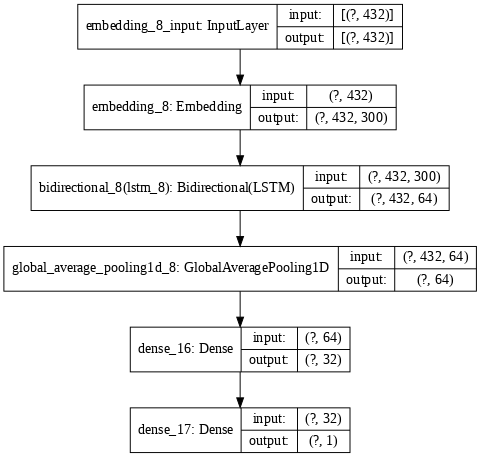

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi = 70)

In [29]:
cvscores

,tp,fp,tn,fn,accuracy,precision,recall,auc
0,340.0,25.0,706.0,133.0,0.868771,0.931507,0.718816,0.928105
1,323.0,22.0,708.0,151.0,0.856312,0.936232,0.681435,0.912794
2,320.0,5.0,725.0,154.0,0.867940,0.984615,0.675106,0.910406
3,316.0,1.0,729.0,158.0,0.867940,0.996845,0.666667,0.919815
4,343.0,34.0,696.0,130.0,0.863674,0.909814,0.725159,0.913781
5,336.0,12.0,718.0,137.0,0.876143,0.965517,0.710359,0.911360
6,328.0,14.0,716.0,145.0,0.867830,0.959064,0.693446,0.914818
7,323.0,6.0,724.0,150.0,0.870324,0.981763,0.682875,0.930537
8,296.0,0.0,730.0,177.0,0.852868,1.000000,0.625793,0.917509


In [30]:
cvscores.mean(axis = 0)

tp           325.000000
fp            13.222222
tn           716.888889
fn           148.333333
accuracy       0.865756
precision      0.962818
recall         0.686628
auc            0.917681
dtype: float64

#### Learning rate 0.0001

##### Bi-LSTM

Building Bi-LSTM model...
Training model...
Train on 8772 samples, validate on 975 samples
Epoch 1/1000
8772/8772 [==============================] - 16s 2ms/sample - loss: 0.5546 - tp: 1640.0000 - fp: 249.0000 - tn: 5068.0000 - fn: 1815.0000 - accuracy: 0.7647 - precision: 0.8682 - recall: 0.4747 - auc: 0.8009 - val_loss: 0.3989 - val_tp: 250.0000 - val_fp: 8.0000 - val_tn: 588.0000 - val_fn: 129.0000 - val_accuracy: 0.8595 - val_precision: 0.9690 - val_recall: 0.6596 - val_auc: 0.8242
Epoch 2/1000
8772/8772 [==============================] - 12s 1ms/sample - loss: 0.3661 - tp: 2256.0000 - fp: 23.0000 - tn: 5294.0000 - fn: 1199.0000 - accuracy: 0.8607 - precision: 0.9899 - recall: 0.6530 - auc: 0.8512 - val_loss: 0.3578 - val_tp: 250.0000 - val_fp: 4.0000 - val_tn: 592.0000 - val_fn: 129.0000 - val_accuracy: 0.8636 - val_precision: 0.9843 - val_recall: 0.6596 - val_auc: 0.8581
Epoch 3/1000
8772/8772 [==============================] - 11s 1ms/sample - loss: 0.3492 - tp: 2307.0000 - fp: 

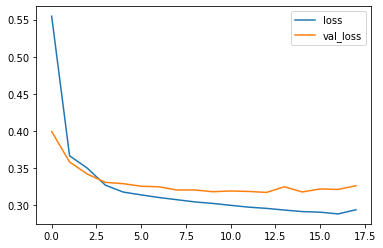

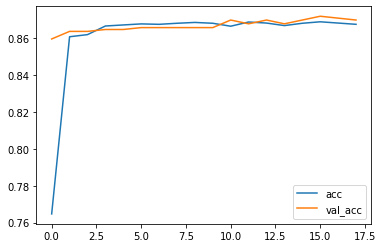

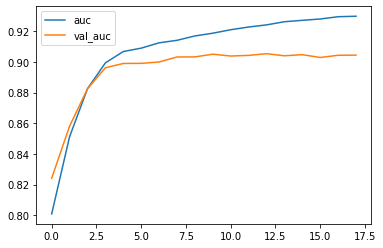

1084/1084 [==============================] - 1s 667us/sample - loss: 0.3074 - tp: 297.0000 - fp: 12.0000 - tn: 646.0000 - fn: 129.0000 - accuracy: 0.8699 - precision: 0.9612 - recall: 0.6972 - auc: 0.9182
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5606 - tp: 1499.0000 - fp: 237.0000 - tn: 5074.0000 - fn: 1963.0000 - accuracy: 0.7492 - precision: 0.8635 - recall: 0.4330 - auc: 0.7819 - val_loss: 0.4329 - val_tp: 242.0000 - val_fp: 13.0000 - val_tn: 590.0000 - val_fn: 130.0000 - val_accuracy: 0.8533 - val_precision: 0.9490 - val_recall: 0.6505 - val_auc: 0.8143
Epoch 2/1000
8773/8773 [==============================] - 11s 1ms/sample - loss: 0.3637 - tp: 2316.0000 - fp: 31.0000 - tn: 5280.0000 - fn: 1146.0000 - accuracy: 0.8658 - precision: 0.9868 - recall: 0.6690 - auc: 0.8446 - val_loss: 0.3683 - val_tp: 239.0000 - val_fp: 3.0000 - val_tn: 600.0000 - val_fn: 133.0000 - val_accuracy: 

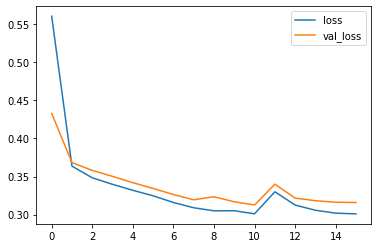

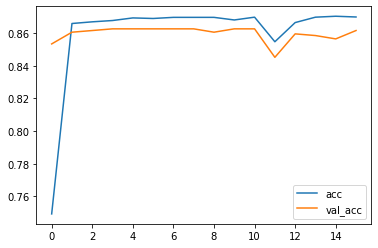

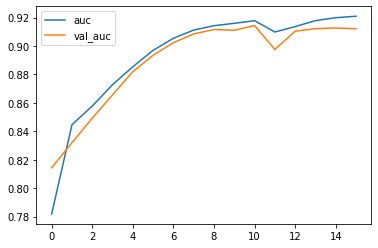

1083/1083 [==============================] - 1s 663us/sample - loss: 0.3175 - tp: 276.0000 - fp: 0.0000e+00 - tn: 657.0000 - fn: 150.0000 - accuracy: 0.8615 - precision: 1.0000 - recall: 0.6479 - auc: 0.9048
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5220 - tp: 1370.0000 - fp: 13.0000 - tn: 5291.0000 - fn: 2099.0000 - accuracy: 0.7593 - precision: 0.9906 - recall: 0.3949 - auc: 0.8202 - val_loss: 0.3955 - val_tp: 247.0000 - val_fp: 13.0000 - val_tn: 597.0000 - val_fn: 118.0000 - val_accuracy: 0.8656 - val_precision: 0.9500 - val_recall: 0.6767 - val_auc: 0.8431
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3645 - tp: 2317.0000 - fp: 79.0000 - tn: 5225.0000 - fn: 1152.0000 - accuracy: 0.8597 - precision: 0.9670 - recall: 0.6679 - auc: 0.8826 - val_loss: 0.3459 - val_tp: 245.0000 - val_fp: 10.0000 - val_tn: 600.0000 - val_fn: 120.0000 - val_accurac

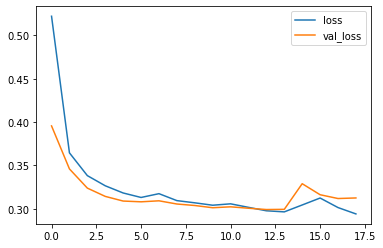

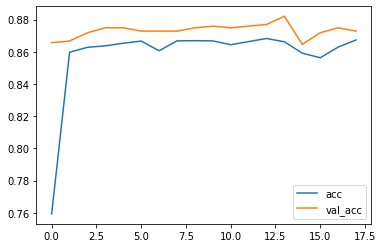

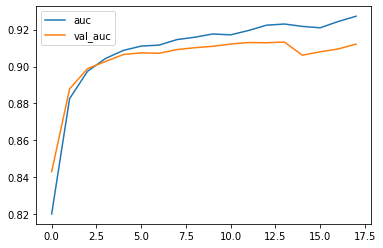

1083/1083 [==============================] - 1s 674us/sample - loss: 0.3189 - tp: 288.0000 - fp: 6.0000 - tn: 651.0000 - fn: 138.0000 - accuracy: 0.8670 - precision: 0.9796 - recall: 0.6761 - auc: 0.9062
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 16s 2ms/sample - loss: 0.5469 - tp: 1499.0000 - fp: 157.0000 - tn: 5152.0000 - fn: 1965.0000 - accuracy: 0.7581 - precision: 0.9052 - recall: 0.4327 - auc: 0.7989 - val_loss: 0.4014 - val_tp: 243.0000 - val_fp: 10.0000 - val_tn: 595.0000 - val_fn: 127.0000 - val_accuracy: 0.8595 - val_precision: 0.9605 - val_recall: 0.6568 - val_auc: 0.8178
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3622 - tp: 2286.0000 - fp: 24.0000 - tn: 5285.0000 - fn: 1178.0000 - accuracy: 0.8630 - precision: 0.9896 - recall: 0.6599 - auc: 0.8473 - val_loss: 0.3653 - val_tp: 241.0000 - val_fp: 5.0000 - val_tn: 600.0000 - val_fn: 129.0000 - val_accuracy: 0

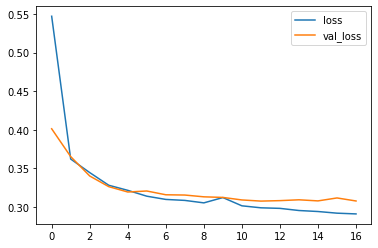

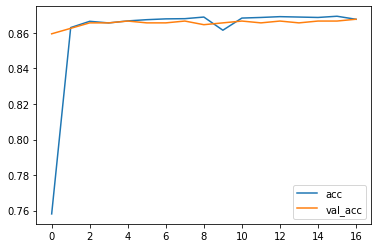

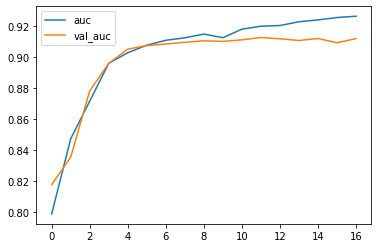

1083/1083 [==============================] - 1s 653us/sample - loss: 0.2990 - tp: 285.0000 - fp: 1.0000 - tn: 656.0000 - fn: 141.0000 - accuracy: 0.8689 - precision: 0.9965 - recall: 0.6690 - auc: 0.9205
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5526 - tp: 1342.0000 - fp: 63.0000 - tn: 5248.0000 - fn: 2120.0000 - accuracy: 0.7512 - precision: 0.9552 - recall: 0.3876 - auc: 0.7835 - val_loss: 0.4369 - val_tp: 246.0000 - val_fp: 40.0000 - val_tn: 563.0000 - val_fn: 126.0000 - val_accuracy: 0.8297 - val_precision: 0.8601 - val_recall: 0.6613 - val_auc: 0.8090
Epoch 2/1000
8773/8773 [==============================] - 11s 1ms/sample - loss: 0.3708 - tp: 2268.0000 - fp: 53.0000 - tn: 5258.0000 - fn: 1194.0000 - accuracy: 0.8579 - precision: 0.9772 - recall: 0.6551 - auc: 0.8671 - val_loss: 0.3653 - val_tp: 236.0000 - val_fp: 6.0000 - val_tn: 597.0000 - val_fn: 136.0000 - val_accuracy: 0.

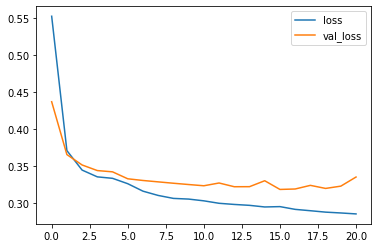

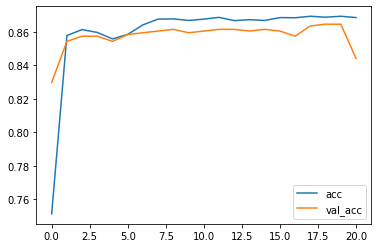

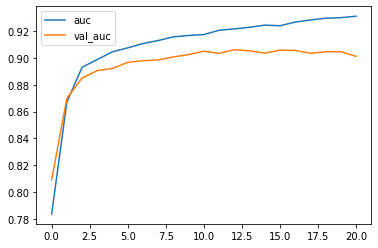

1083/1083 [==============================] - 1s 663us/sample - loss: 0.3131 - tp: 296.0000 - fp: 17.0000 - tn: 640.0000 - fn: 130.0000 - accuracy: 0.8643 - precision: 0.9457 - recall: 0.6948 - auc: 0.9098
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 16s 2ms/sample - loss: 0.5429 - tp: 1363.0000 - fp: 2.0000 - tn: 5313.0000 - fn: 2095.0000 - accuracy: 0.7610 - precision: 0.9985 - recall: 0.3942 - auc: 0.7992 - val_loss: 0.4270 - val_tp: 252.0000 - val_fp: 4.0000 - val_tn: 595.0000 - val_fn: 124.0000 - val_accuracy: 0.8687 - val_precision: 0.9844 - val_recall: 0.6702 - val_auc: 0.8278
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3855 - tp: 2295.0000 - fp: 53.0000 - tn: 5262.0000 - fn: 1163.0000 - accuracy: 0.8614 - precision: 0.9774 - recall: 0.6637 - auc: 0.8441 - val_loss: 0.3539 - val_tp: 253.0000 - val_fp: 2.0000 - val_tn: 597.0000 - val_fn: 123.0000 - val_accuracy: 0.8

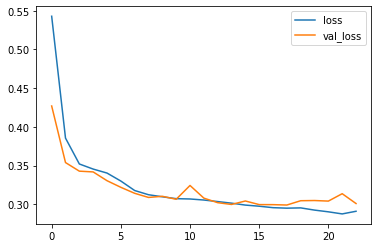

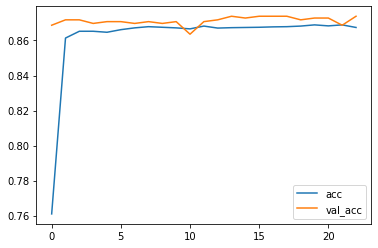

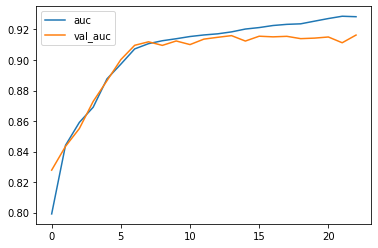

1083/1083 [==============================] - 1s 651us/sample - loss: 0.3068 - tp: 290.0000 - fp: 0.0000e+00 - tn: 657.0000 - fn: 136.0000 - accuracy: 0.8744 - precision: 1.0000 - recall: 0.6808 - auc: 0.9123
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 16s 2ms/sample - loss: 0.5712 - tp: 1514.0000 - fp: 456.0000 - tn: 4853.0000 - fn: 1950.0000 - accuracy: 0.7257 - precision: 0.7685 - recall: 0.4371 - auc: 0.7707 - val_loss: 0.4411 - val_tp: 240.0000 - val_fp: 15.0000 - val_tn: 590.0000 - val_fn: 130.0000 - val_accuracy: 0.8513 - val_precision: 0.9412 - val_recall: 0.6486 - val_auc: 0.8183
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3796 - tp: 2215.0000 - fp: 27.0000 - tn: 5282.0000 - fn: 1249.0000 - accuracy: 0.8546 - precision: 0.9880 - recall: 0.6394 - auc: 0.8378 - val_loss: 0.3669 - val_tp: 235.0000 - val_fp: 1.0000 - val_tn: 604.0000 - val_fn: 135.0000 - val_accurac

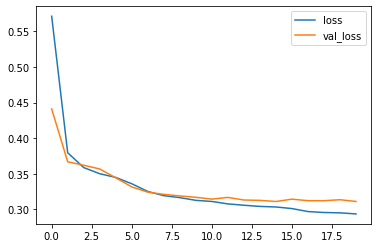

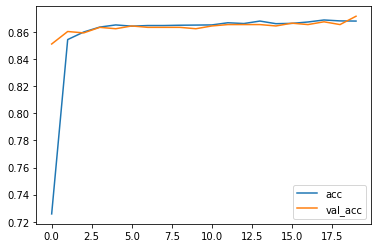

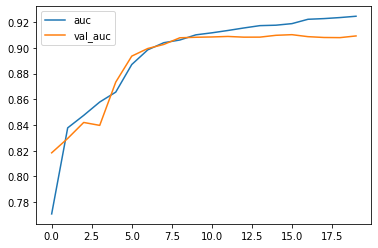

1083/1083 [==============================] - 1s 652us/sample - loss: 0.2951 - tp: 302.0000 - fp: 11.0000 - tn: 646.0000 - fn: 124.0000 - accuracy: 0.8753 - precision: 0.9649 - recall: 0.7089 - auc: 0.9153
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 16s 2ms/sample - loss: 0.5533 - tp: 1209.0000 - fp: 31.0000 - tn: 5284.0000 - fn: 2249.0000 - accuracy: 0.7401 - precision: 0.9750 - recall: 0.3496 - auc: 0.7872 - val_loss: 0.4354 - val_tp: 244.0000 - val_fp: 0.0000e+00 - val_tn: 599.0000 - val_fn: 132.0000 - val_accuracy: 0.8646 - val_precision: 1.0000 - val_recall: 0.6489 - val_auc: 0.8428
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3660 - tp: 2296.0000 - fp: 29.0000 - tn: 5286.0000 - fn: 1162.0000 - accuracy: 0.8642 - precision: 0.9875 - recall: 0.6640 - auc: 0.8763 - val_loss: 0.3336 - val_tp: 248.0000 - val_fp: 3.0000 - val_tn: 596.0000 - val_fn: 128.0000 - val_accuracy

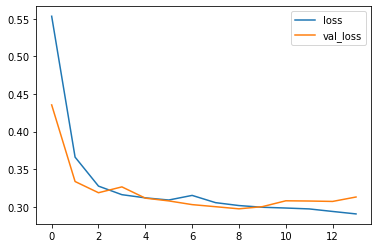

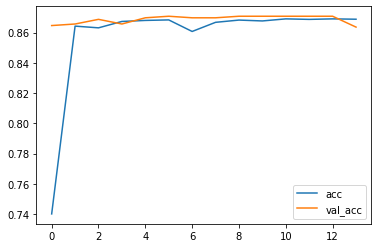

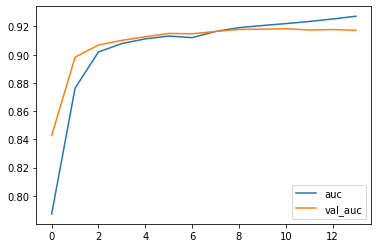

1083/1083 [==============================] - 1s 637us/sample - loss: 0.3271 - tp: 282.0000 - fp: 3.0000 - tn: 654.0000 - fn: 144.0000 - accuracy: 0.8643 - precision: 0.9895 - recall: 0.6620 - auc: 0.9032
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 16s 2ms/sample - loss: 0.5595 - tp: 1426.0000 - fp: 195.0000 - tn: 5101.0000 - fn: 2051.0000 - accuracy: 0.7440 - precision: 0.8797 - recall: 0.4101 - auc: 0.7780 - val_loss: 0.4050 - val_tp: 232.0000 - val_fp: 5.0000 - val_tn: 613.0000 - val_fn: 125.0000 - val_accuracy: 0.8667 - val_precision: 0.9789 - val_recall: 0.6499 - val_auc: 0.8225
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3598 - tp: 2301.0000 - fp: 22.0000 - tn: 5274.0000 - fn: 1176.0000 - accuracy: 0.8634 - precision: 0.9905 - recall: 0.6618 - auc: 0.8655 - val_loss: 0.3480 - val_tp: 233.0000 - val_fp: 3.0000 - val_tn: 615.0000 - val_fn: 124.0000 - val_accuracy: 0.

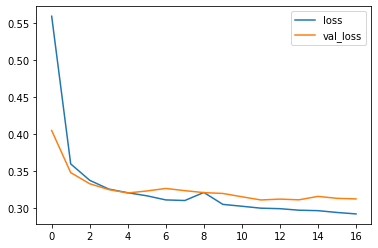

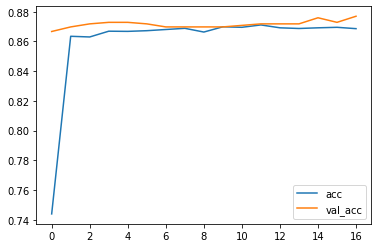

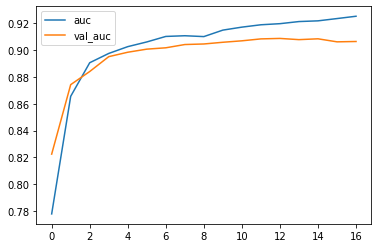

1083/1083 [==============================] - 1s 688us/sample - loss: 0.3101 - tp: 274.0000 - fp: 1.0000 - tn: 656.0000 - fn: 152.0000 - accuracy: 0.8587 - precision: 0.9964 - recall: 0.6432 - auc: 0.9185
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5443 - tp: 1298.0000 - fp: 37.0000 - tn: 5278.0000 - fn: 2160.0000 - accuracy: 0.7496 - precision: 0.9723 - recall: 0.3754 - auc: 0.7936 - val_loss: 0.4385 - val_tp: 247.0000 - val_fp: 6.0000 - val_tn: 593.0000 - val_fn: 129.0000 - val_accuracy: 0.8615 - val_precision: 0.9763 - val_recall: 0.6569 - val_auc: 0.8281
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3601 - tp: 2318.0000 - fp: 21.0000 - tn: 5294.0000 - fn: 1140.0000 - accuracy: 0.8677 - precision: 0.9910 - recall: 0.6703 - auc: 0.8616 - val_loss: 0.3480 - val_tp: 243.0000 - val_fp: 0.0000e+00 - val_tn: 599.0000 - val_fn: 133.0000 - val_accuracy:

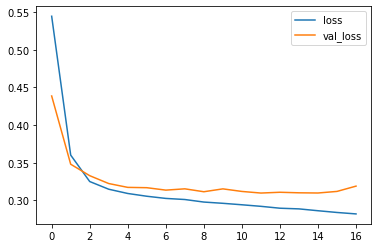

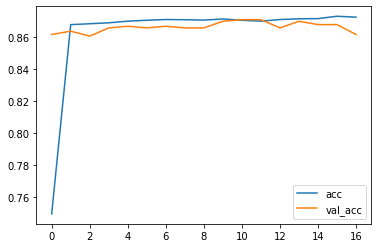

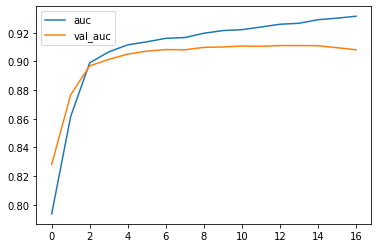

1083/1083 [==============================] - 1s 693us/sample - loss: 0.3161 - tp: 279.0000 - fp: 9.0000 - tn: 648.0000 - fn: 147.0000 - accuracy: 0.8560 - precision: 0.9688 - recall: 0.6549 - auc: 0.9141


In [31]:
# some configuration
VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 32   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.0001

print('Building Bi-LSTM model...')
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 7)
cvscores_1 = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'auc'])
labels = data_cleaned['relevance'].values
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

for train, test in kfold.split(texts, labels):

  model = tf.keras.Sequential([
    #Embedding

       tf.keras.layers.Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix], trainable=False),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
       #tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, padding='valid', activation='relu', strides=1),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(32, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )


# Training model:
# early stop model fitting when validation loss does not decrease in 5 steps
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
#  mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
#class_weights = class_weight.compute_class_weight('balanced', np.unique(relevance_train.values), relevance_train.values)
#class_weight_dict = dict(enumerate(class_weights))

# fit model
  print('Training model...')
  r = model.fit(
    texts[train],
    labels[train],
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
    #callbacks=[es, mc],
    #class_weight = class_weight_dict
    #use_multiprocessing=True
  )

#saved_model = tf.keras.models.load_model('best_model.h5')
#saved_model.summary()

  model.summary()

# plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

# accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

# auc
  plt.plot(r.history['auc'], label='auc')
  plt.plot(r.history['val_auc'], label='val_auc')
  plt.legend()
  plt.show()

#saved_model.evaluate(x = test_c, y = relevance_test.values)
  scores = model.evaluate(x = texts[test], y = labels[test])
  cvscores_1 = cvscores_1.append({'tp': scores[1], 'fp': scores[2], 'tn': scores[3], 'fn': scores[4], 'accuracy': scores[5],'precision': scores[6], 'recall': scores[7], 'auc': scores[8]}, ignore_index=True)

In [32]:
cvscores_1

,tp,fp,tn,fn,accuracy,precision,recall,auc
0,297.0,12.0,646.0,129.0,0.869926,0.961165,0.697183,0.918179
1,276.0,0.0,657.0,150.0,0.861496,1.000000,0.647887,0.904767
2,288.0,6.0,651.0,138.0,0.867036,0.979592,0.676056,0.906161
3,285.0,1.0,656.0,141.0,0.868883,0.996503,0.669014,0.920459
4,296.0,17.0,640.0,130.0,0.864266,0.945687,0.694836,0.909794
5,290.0,0.0,657.0,136.0,0.874423,1.000000,0.680751,0.912261
6,302.0,11.0,646.0,124.0,0.875346,0.964856,0.708920,0.915316
7,282.0,3.0,654.0,144.0,0.864266,0.989474,0.661972,0.903195
8,274.0,1.0,656.0,152.0,0.858726,0.996364,0.643192,0.918492
9,279.0,9.0,648.0,147.0,0.855956,0.968750,0.654930,0.914062


In [33]:
cvscores_1.mean()

tp           286.900000
fp             6.000000
tn           651.100000
fn           139.100000
accuracy       0.866032
precision      0.980239
recall         0.673474
auc            0.912269
dtype: float64

##### Bi-LSTM + 1D CNN

Building Bi-LSTM model...
Training model...
Train on 8772 samples, validate on 975 samples
Epoch 1/1000
8772/8772 [==============================] - 18s 2ms/sample - loss: 0.5138 - tp: 1633.0000 - fp: 75.0000 - tn: 5242.0000 - fn: 1822.0000 - accuracy: 0.7837 - precision: 0.9561 - recall: 0.4726 - auc: 0.8089 - val_loss: 0.3906 - val_tp: 252.0000 - val_fp: 8.0000 - val_tn: 588.0000 - val_fn: 127.0000 - val_accuracy: 0.8615 - val_precision: 0.9692 - val_recall: 0.6649 - val_auc: 0.8309
Epoch 2/1000
8772/8772 [==============================] - 12s 1ms/sample - loss: 0.3480 - tp: 2308.0000 - fp: 50.0000 - tn: 5267.0000 - fn: 1147.0000 - accuracy: 0.8635 - precision: 0.9788 - recall: 0.6680 - auc: 0.8748 - val_loss: 0.3350 - val_tp: 251.0000 - val_fp: 2.0000 - val_tn: 594.0000 - val_fn: 128.0000 - val_accuracy: 0.8667 - val_precision: 0.9921 - val_recall: 0.6623 - val_auc: 0.8869
Epoch 3/1000
8772/8772 [==============================] - 12s 1ms/sample - loss: 0.3232 - tp: 2300.0000 - fp: 1

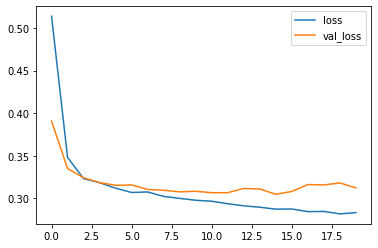

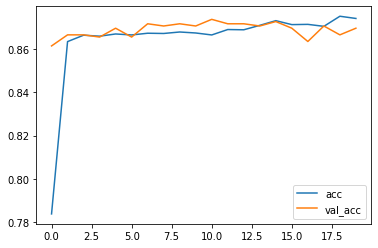

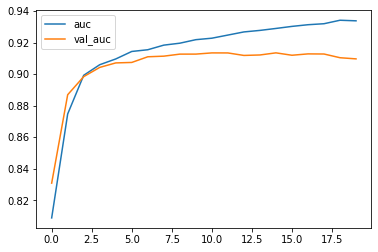

1084/1084 [==============================] - 1s 702us/sample - loss: 0.2919 - tp: 300.0000 - fp: 8.0000 - tn: 650.0000 - fn: 126.0000 - accuracy: 0.8764 - precision: 0.9740 - recall: 0.7042 - auc: 0.9269
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 18s 2ms/sample - loss: 0.5192 - tp: 1690.0000 - fp: 108.0000 - tn: 5203.0000 - fn: 1772.0000 - accuracy: 0.7857 - precision: 0.9399 - recall: 0.4882 - auc: 0.8146 - val_loss: 0.3936 - val_tp: 241.0000 - val_fp: 6.0000 - val_tn: 597.0000 - val_fn: 131.0000 - val_accuracy: 0.8595 - val_precision: 0.9757 - val_recall: 0.6478 - val_auc: 0.8292
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3511 - tp: 2346.0000 - fp: 59.0000 - tn: 5252.0000 - fn: 1116.0000 - accuracy: 0.8661 - precision: 0.9755 - recall: 0.6776 - auc: 0.8730 - val_loss: 0.3426 - val_tp: 243.0000 - val_fp: 7.0000 - val_tn: 596.0000 - val_fn: 129.0000 - val_accuracy: 0.

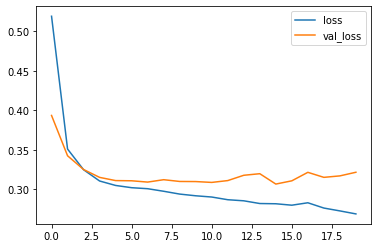

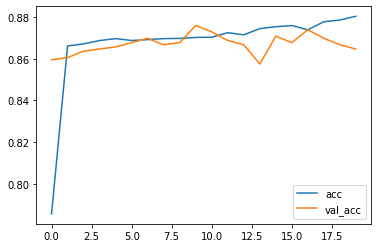

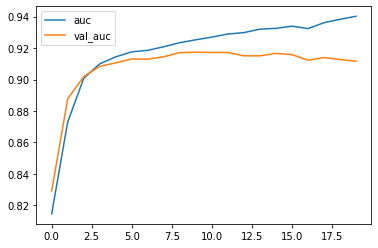

1083/1083 [==============================] - 1s 661us/sample - loss: 0.3219 - tp: 291.0000 - fp: 24.0000 - tn: 633.0000 - fn: 135.0000 - accuracy: 0.8532 - precision: 0.9238 - recall: 0.6831 - auc: 0.9089
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.4852 - tp: 1787.0000 - fp: 104.0000 - tn: 5200.0000 - fn: 1682.0000 - accuracy: 0.7964 - precision: 0.9450 - recall: 0.5151 - auc: 0.8173 - val_loss: 0.3419 - val_tp: 242.0000 - val_fp: 1.0000 - val_tn: 609.0000 - val_fn: 123.0000 - val_accuracy: 0.8728 - val_precision: 0.9959 - val_recall: 0.6630 - val_auc: 0.8506
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3330 - tp: 2298.0000 - fp: 11.0000 - tn: 5293.0000 - fn: 1171.0000 - accuracy: 0.8653 - precision: 0.9952 - recall: 0.6624 - auc: 0.8892 - val_loss: 0.3094 - val_tp: 244.0000 - val_fp: 0.0000e+00 - val_tn: 610.0000 - val_fn: 121.0000 - val_accurac

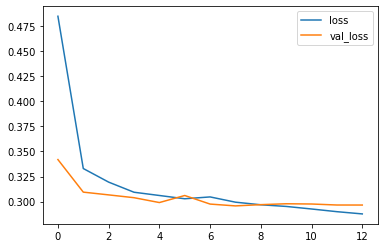

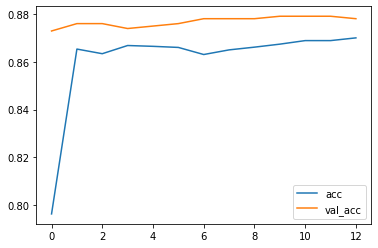

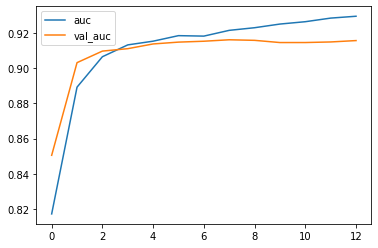

1083/1083 [==============================] - 1s 644us/sample - loss: 0.3137 - tp: 288.0000 - fp: 4.0000 - tn: 653.0000 - fn: 138.0000 - accuracy: 0.8689 - precision: 0.9863 - recall: 0.6761 - auc: 0.9102
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5585 - tp: 2342.0000 - fp: 744.0000 - tn: 4565.0000 - fn: 1122.0000 - accuracy: 0.7873 - precision: 0.7589 - recall: 0.6761 - auc: 0.8118 - val_loss: 0.3667 - val_tp: 240.0000 - val_fp: 2.0000 - val_tn: 603.0000 - val_fn: 130.0000 - val_accuracy: 0.8646 - val_precision: 0.9917 - val_recall: 0.6486 - val_auc: 0.8179
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3518 - tp: 2308.0000 - fp: 20.0000 - tn: 5289.0000 - fn: 1156.0000 - accuracy: 0.8660 - precision: 0.9914 - recall: 0.6663 - auc: 0.8462 - val_loss: 0.3526 - val_tp: 241.0000 - val_fp: 1.0000 - val_tn: 604.0000 - val_fn: 129.0000 - val_accuracy: 0.

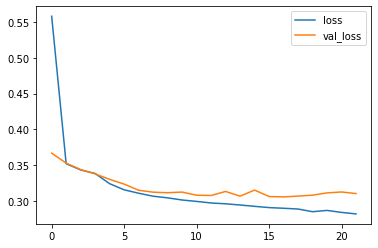

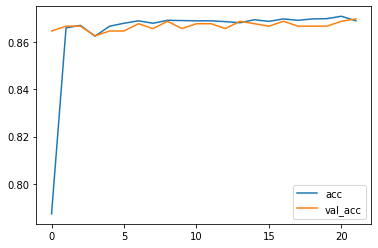

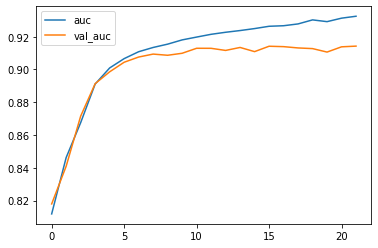

1083/1083 [==============================] - 1s 653us/sample - loss: 0.2973 - tp: 295.0000 - fp: 2.0000 - tn: 655.0000 - fn: 131.0000 - accuracy: 0.8772 - precision: 0.9933 - recall: 0.6925 - auc: 0.9205
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 18s 2ms/sample - loss: 0.5101 - tp: 1658.0000 - fp: 121.0000 - tn: 5190.0000 - fn: 1804.0000 - accuracy: 0.7806 - precision: 0.9320 - recall: 0.4789 - auc: 0.8122 - val_loss: 0.3937 - val_tp: 245.0000 - val_fp: 28.0000 - val_tn: 575.0000 - val_fn: 127.0000 - val_accuracy: 0.8410 - val_precision: 0.8974 - val_recall: 0.6586 - val_auc: 0.8520
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3486 - tp: 2398.0000 - fp: 169.0000 - tn: 5142.0000 - fn: 1064.0000 - accuracy: 0.8595 - precision: 0.9342 - recall: 0.6927 - auc: 0.8879 - val_loss: 0.3457 - val_tp: 243.0000 - val_fp: 7.0000 - val_tn: 596.0000 - val_fn: 129.0000 - val_accuracy: 

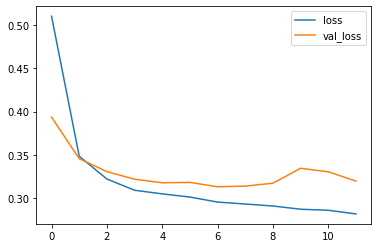

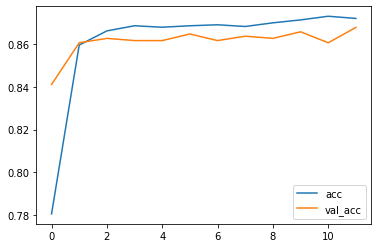

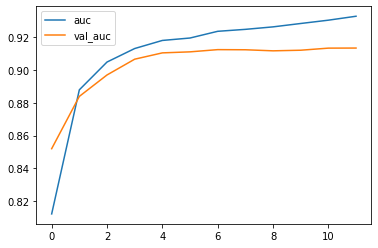

1083/1083 [==============================] - 1s 686us/sample - loss: 0.3110 - tp: 301.0000 - fp: 23.0000 - tn: 634.0000 - fn: 125.0000 - accuracy: 0.8633 - precision: 0.9290 - recall: 0.7066 - auc: 0.9103
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5159 - tp: 1450.0000 - fp: 7.0000 - tn: 5308.0000 - fn: 2008.0000 - accuracy: 0.7703 - precision: 0.9952 - recall: 0.4193 - auc: 0.8170 - val_loss: 0.4048 - val_tp: 267.0000 - val_fp: 37.0000 - val_tn: 562.0000 - val_fn: 109.0000 - val_accuracy: 0.8503 - val_precision: 0.8783 - val_recall: 0.7101 - val_auc: 0.8666
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3546 - tp: 2354.0000 - fp: 128.0000 - tn: 5187.0000 - fn: 1104.0000 - accuracy: 0.8596 - precision: 0.9484 - recall: 0.6807 - auc: 0.8917 - val_loss: 0.3347 - val_tp: 256.0000 - val_fp: 6.0000 - val_tn: 593.0000 - val_fn: 120.0000 - val_accuracy: 0

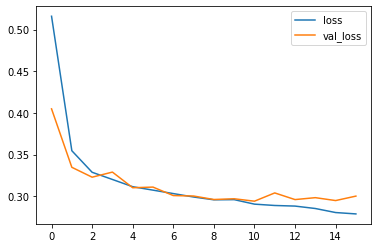

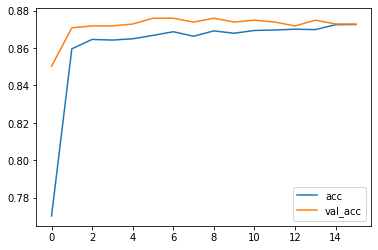

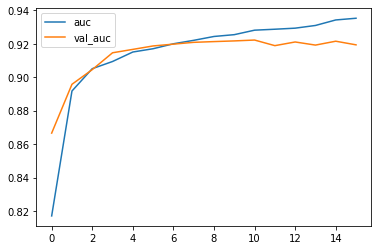

1083/1083 [==============================] - 1s 691us/sample - loss: 0.3097 - tp: 301.0000 - fp: 16.0000 - tn: 641.0000 - fn: 125.0000 - accuracy: 0.8698 - precision: 0.9495 - recall: 0.7066 - auc: 0.9159
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 16s 2ms/sample - loss: 0.5116 - tp: 1505.0000 - fp: 20.0000 - tn: 5289.0000 - fn: 1959.0000 - accuracy: 0.7744 - precision: 0.9869 - recall: 0.4345 - auc: 0.8177 - val_loss: 0.4045 - val_tp: 242.0000 - val_fp: 8.0000 - val_tn: 597.0000 - val_fn: 128.0000 - val_accuracy: 0.8605 - val_precision: 0.9680 - val_recall: 0.6541 - val_auc: 0.8542
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3591 - tp: 2376.0000 - fp: 161.0000 - tn: 5148.0000 - fn: 1088.0000 - accuracy: 0.8576 - precision: 0.9365 - recall: 0.6859 - auc: 0.8883 - val_loss: 0.3505 - val_tp: 246.0000 - val_fp: 12.0000 - val_tn: 593.0000 - val_fn: 124.0000 - val_accuracy: 

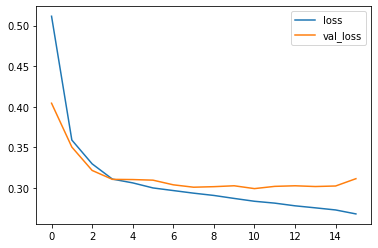

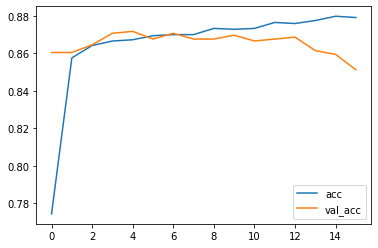

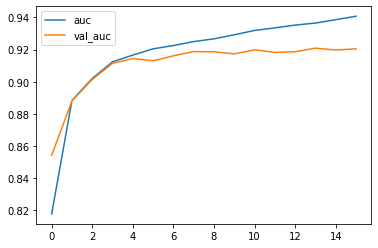

1083/1083 [==============================] - 1s 675us/sample - loss: 0.2993 - tp: 309.0000 - fp: 24.0000 - tn: 633.0000 - fn: 117.0000 - accuracy: 0.8698 - precision: 0.9279 - recall: 0.7254 - auc: 0.9163
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 16s 2ms/sample - loss: 0.5461 - tp: 1213.0000 - fp: 4.0000 - tn: 5311.0000 - fn: 2245.0000 - accuracy: 0.7436 - precision: 0.9967 - recall: 0.3508 - auc: 0.8030 - val_loss: 0.4086 - val_tp: 252.0000 - val_fp: 9.0000 - val_tn: 590.0000 - val_fn: 124.0000 - val_accuracy: 0.8636 - val_precision: 0.9655 - val_recall: 0.6702 - val_auc: 0.8670
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3522 - tp: 2323.0000 - fp: 63.0000 - tn: 5252.0000 - fn: 1135.0000 - accuracy: 0.8634 - precision: 0.9736 - recall: 0.6718 - auc: 0.8871 - val_loss: 0.3247 - val_tp: 257.0000 - val_fp: 10.0000 - val_tn: 589.0000 - val_fn: 119.0000 - val_accuracy: 0.

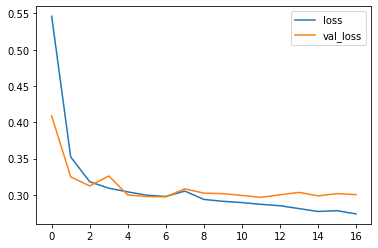

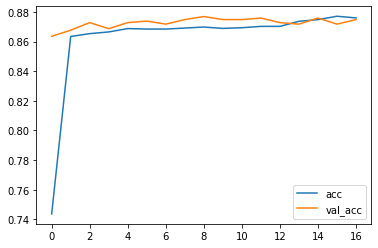

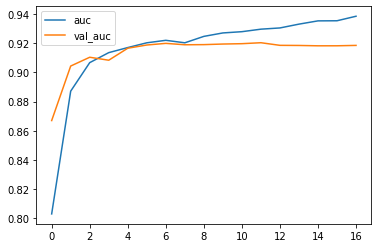

1083/1083 [==============================] - 1s 659us/sample - loss: 0.3183 - tp: 293.0000 - fp: 11.0000 - tn: 646.0000 - fn: 133.0000 - accuracy: 0.8670 - precision: 0.9638 - recall: 0.6878 - auc: 0.9095
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 18s 2ms/sample - loss: 0.5182 - tp: 1429.0000 - fp: 13.0000 - tn: 5283.0000 - fn: 2048.0000 - accuracy: 0.7651 - precision: 0.9910 - recall: 0.4110 - auc: 0.8211 - val_loss: 0.3966 - val_tp: 236.0000 - val_fp: 6.0000 - val_tn: 612.0000 - val_fn: 121.0000 - val_accuracy: 0.8697 - val_precision: 0.9752 - val_recall: 0.6611 - val_auc: 0.8348
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3559 - tp: 2339.0000 - fp: 50.0000 - tn: 5246.0000 - fn: 1138.0000 - accuracy: 0.8646 - precision: 0.9791 - recall: 0.6727 - auc: 0.8825 - val_loss: 0.3336 - val_tp: 234.0000 - val_fp: 1.0000 - val_tn: 617.0000 - val_fn: 123.0000 - val_accuracy: 0.

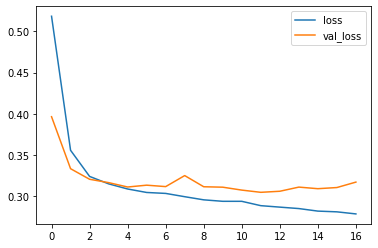

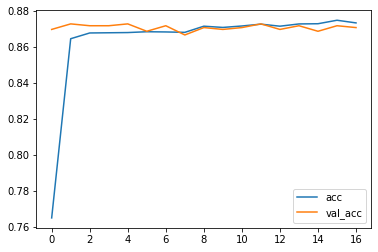

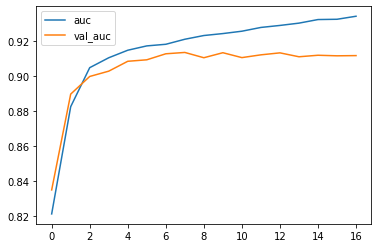

1083/1083 [==============================] - 1s 680us/sample - loss: 0.3113 - tp: 273.0000 - fp: 4.0000 - tn: 653.0000 - fn: 153.0000 - accuracy: 0.8550 - precision: 0.9856 - recall: 0.6408 - auc: 0.9178
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5046 - tp: 1773.0000 - fp: 217.0000 - tn: 5098.0000 - fn: 1685.0000 - accuracy: 0.7832 - precision: 0.8910 - recall: 0.5127 - auc: 0.8054 - val_loss: 0.3798 - val_tp: 248.0000 - val_fp: 7.0000 - val_tn: 592.0000 - val_fn: 128.0000 - val_accuracy: 0.8615 - val_precision: 0.9725 - val_recall: 0.6596 - val_auc: 0.8459
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3372 - tp: 2346.0000 - fp: 42.0000 - tn: 5273.0000 - fn: 1112.0000 - accuracy: 0.8685 - precision: 0.9824 - recall: 0.6784 - auc: 0.8883 - val_loss: 0.3373 - val_tp: 248.0000 - val_fp: 5.0000 - val_tn: 594.0000 - val_fn: 128.0000 - val_accuracy: 0.

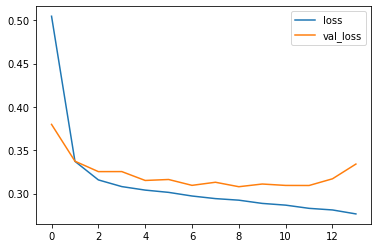

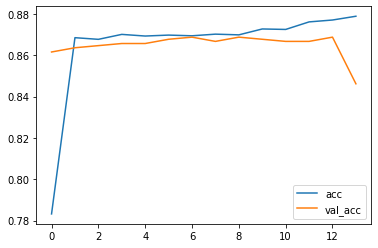

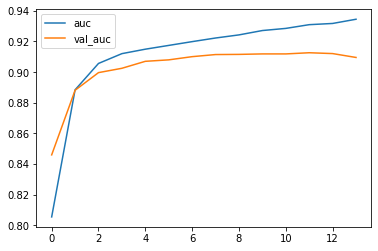

1083/1083 [==============================] - 1s 727us/sample - loss: 0.3189 - tp: 282.0000 - fp: 8.0000 - tn: 649.0000 - fn: 144.0000 - accuracy: 0.8596 - precision: 0.9724 - recall: 0.6620 - auc: 0.9119


In [34]:
# some configuration
VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 32   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.0001
N_SPLITS = 10

print('Building Bi-LSTM model...')
kfold = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state = 7)
cvscores_2 = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'auc'])
labels = data_cleaned['relevance'].values
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

for train, test in kfold.split(texts, labels):

  model = tf.keras.Sequential([
    #Embedding

       tf.keras.layers.Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix], trainable=False),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
       tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, padding='valid', activation='relu', strides=1),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(32, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )


# Training model:
# early stop model fitting when validation loss does not decrease in 5 steps
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

# fit model
  from sklearn.utils import class_weight

  print('Training model...')
  r = model.fit(
    texts[train],
    labels[train],
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
  )

  model.summary()

# plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

# accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

# auc
  plt.plot(r.history['auc'], label='auc')
  plt.plot(r.history['val_auc'], label='val_auc')
  plt.legend()
  plt.show()

  scores = model.evaluate(x = texts[test], y = labels[test])
  cvscores_2 = cvscores_2.append({'tp': scores[1], 'fp': scores[2], 'tn': scores[3], 'fn': scores[4], 'accuracy': scores[5],'precision': scores[6], 'recall': scores[7], 'auc': scores[8]}, ignore_index=True)

In [35]:
cvscores_2

,tp,fp,tn,fn,accuracy,precision,recall,auc
0,300.0,8.0,650.0,126.0,0.876384,0.974026,0.704225,0.926886
1,291.0,24.0,633.0,135.0,0.853186,0.923810,0.683099,0.908903
2,288.0,4.0,653.0,138.0,0.868883,0.986301,0.676056,0.910212
3,295.0,2.0,655.0,131.0,0.877193,0.993266,0.692488,0.920493
4,301.0,23.0,634.0,125.0,0.863343,0.929012,0.706573,0.910305
5,301.0,16.0,641.0,125.0,0.869806,0.949527,0.706573,0.915850
6,309.0,24.0,633.0,117.0,0.869806,0.927928,0.725352,0.916279
7,293.0,11.0,646.0,133.0,0.867036,0.963816,0.687793,0.909515
8,273.0,4.0,653.0,153.0,0.855032,0.985560,0.640845,0.917751
9,282.0,8.0,649.0,144.0,0.859649,0.972414,0.661972,0.911874


In [36]:
cvscores_2.mean()

tp           293.300000
fp            12.400000
tn           644.700000
fn           132.700000
accuracy       0.866032
precision      0.960566
recall         0.688498
auc            0.914807
dtype: float64

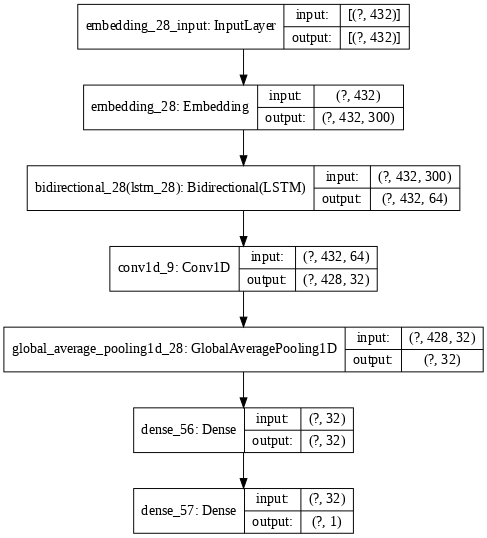

In [37]:
plot_model(model, to_file='model_plot_1.png', show_shapes=True, show_layer_names=True, dpi = 70)

##### Bi-LSTM + Attention Layer

In [0]:
# assign importance weights to each word
class attention(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

Building Bi-LSTM model...
Training model...
Train on 8772 samples, validate on 975 samples
Epoch 1/1000
8772/8772 [==============================] - 17s 2ms/sample - loss: 0.5211 - tp: 1472.0000 - fp: 70.0000 - tn: 5247.0000 - fn: 1983.0000 - accuracy: 0.7660 - precision: 0.9546 - recall: 0.4260 - auc: 0.8050 - val_loss: 0.4186 - val_tp: 249.0000 - val_fp: 3.0000 - val_tn: 593.0000 - val_fn: 130.0000 - val_accuracy: 0.8636 - val_precision: 0.9881 - val_recall: 0.6570 - val_auc: 0.8307
Epoch 2/1000
8772/8772 [==============================] - 12s 1ms/sample - loss: 0.3626 - tp: 2279.0000 - fp: 21.0000 - tn: 5296.0000 - fn: 1176.0000 - accuracy: 0.8635 - precision: 0.9909 - recall: 0.6596 - auc: 0.8642 - val_loss: 0.3565 - val_tp: 246.0000 - val_fp: 1.0000 - val_tn: 595.0000 - val_fn: 133.0000 - val_accuracy: 0.8626 - val_precision: 0.9960 - val_recall: 0.6491 - val_auc: 0.8646
Epoch 3/1000
8772/8772 [==============================] - 12s 1ms/sample - loss: 0.3416 - tp: 2286.0000 - fp: 1

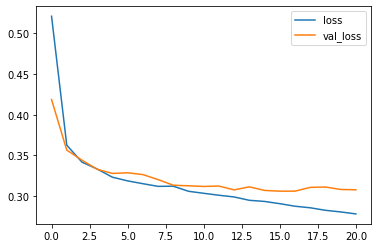

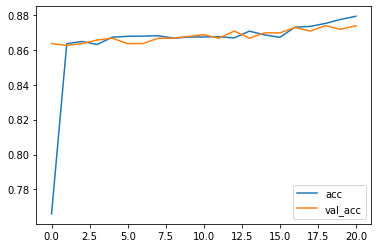

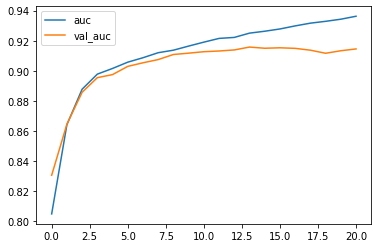

1084/1084 [==============================] - 1s 694us/sample - loss: 0.2827 - tp: 316.0000 - fp: 34.0000 - tn: 624.0000 - fn: 110.0000 - accuracy: 0.8672 - precision: 0.9029 - recall: 0.7418 - auc: 0.9322
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5328 - tp: 1386.0000 - fp: 62.0000 - tn: 5249.0000 - fn: 2076.0000 - accuracy: 0.7563 - precision: 0.9572 - recall: 0.4003 - auc: 0.8004 - val_loss: 0.4333 - val_tp: 238.0000 - val_fp: 6.0000 - val_tn: 597.0000 - val_fn: 134.0000 - val_accuracy: 0.8564 - val_precision: 0.9754 - val_recall: 0.6398 - val_auc: 0.8209
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3701 - tp: 2317.0000 - fp: 24.0000 - tn: 5287.0000 - fn: 1145.0000 - accuracy: 0.8668 - precision: 0.9897 - recall: 0.6693 - auc: 0.8529 - val_loss: 0.3681 - val_tp: 239.0000 - val_fp: 3.0000 - val_tn: 600.0000 - val_fn: 133.0000 - val_accuracy: 0.

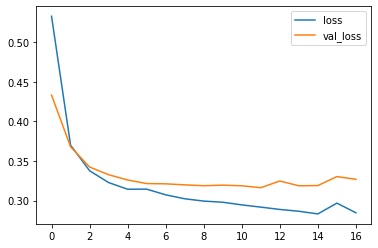

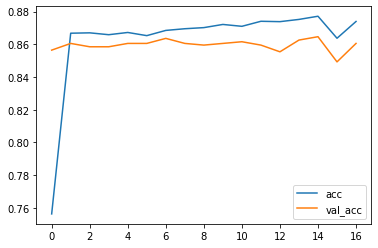

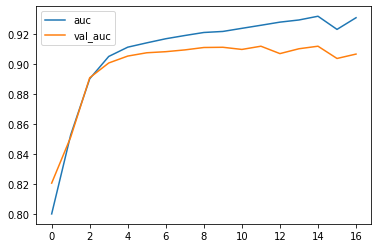

1083/1083 [==============================] - 1s 669us/sample - loss: 0.3259 - tp: 279.0000 - fp: 13.0000 - tn: 644.0000 - fn: 147.0000 - accuracy: 0.8523 - precision: 0.9555 - recall: 0.6549 - auc: 0.9031
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 18s 2ms/sample - loss: 0.5403 - tp: 1326.0000 - fp: 133.0000 - tn: 5171.0000 - fn: 2143.0000 - accuracy: 0.7406 - precision: 0.9088 - recall: 0.3822 - auc: 0.7811 - val_loss: 0.4330 - val_tp: 234.0000 - val_fp: 1.0000 - val_tn: 609.0000 - val_fn: 131.0000 - val_accuracy: 0.8646 - val_precision: 0.9957 - val_recall: 0.6411 - val_auc: 0.8390
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3720 - tp: 2303.0000 - fp: 43.0000 - tn: 5261.0000 - fn: 1166.0000 - accuracy: 0.8622 - precision: 0.9817 - recall: 0.6639 - auc: 0.8650 - val_loss: 0.3378 - val_tp: 245.0000 - val_fp: 3.0000 - val_tn: 607.0000 - val_fn: 120.0000 - val_accuracy: 0

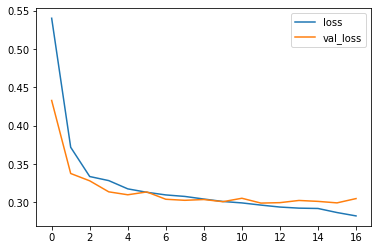

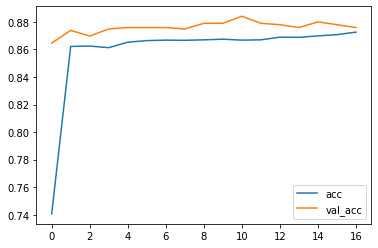

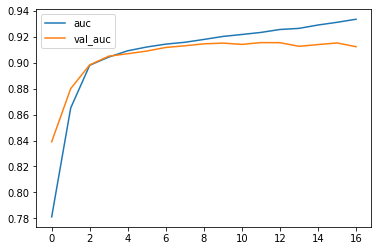

1083/1083 [==============================] - 1s 669us/sample - loss: 0.3237 - tp: 288.0000 - fp: 10.0000 - tn: 647.0000 - fn: 138.0000 - accuracy: 0.8633 - precision: 0.9664 - recall: 0.6761 - auc: 0.9081
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5401 - tp: 1206.0000 - fp: 1.0000 - tn: 5308.0000 - fn: 2258.0000 - accuracy: 0.7425 - precision: 0.9992 - recall: 0.3482 - auc: 0.8008 - val_loss: 0.4335 - val_tp: 241.0000 - val_fp: 6.0000 - val_tn: 599.0000 - val_fn: 129.0000 - val_accuracy: 0.8615 - val_precision: 0.9757 - val_recall: 0.6514 - val_auc: 0.8347
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3670 - tp: 2283.0000 - fp: 32.0000 - tn: 5277.0000 - fn: 1181.0000 - accuracy: 0.8617 - precision: 0.9862 - recall: 0.6591 - auc: 0.8708 - val_loss: 0.3576 - val_tp: 238.0000 - val_fp: 2.0000 - val_tn: 603.0000 - val_fn: 132.0000 - val_accuracy: 0.8

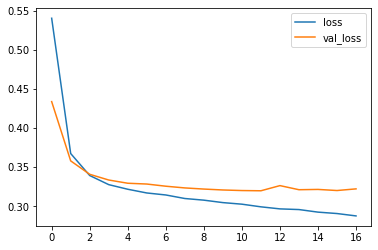

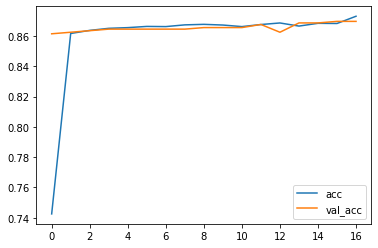

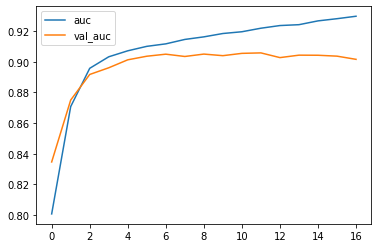

1083/1083 [==============================] - 1s 701us/sample - loss: 0.2957 - tp: 294.0000 - fp: 1.0000 - tn: 656.0000 - fn: 132.0000 - accuracy: 0.8772 - precision: 0.9966 - recall: 0.6901 - auc: 0.9214
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5391 - tp: 1264.0000 - fp: 26.0000 - tn: 5285.0000 - fn: 2198.0000 - accuracy: 0.7465 - precision: 0.9798 - recall: 0.3651 - auc: 0.7896 - val_loss: 0.4507 - val_tp: 234.0000 - val_fp: 3.0000 - val_tn: 600.0000 - val_fn: 138.0000 - val_accuracy: 0.8554 - val_precision: 0.9873 - val_recall: 0.6290 - val_auc: 0.8437
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3766 - tp: 2293.0000 - fp: 40.0000 - tn: 5271.0000 - fn: 1169.0000 - accuracy: 0.8622 - precision: 0.9829 - recall: 0.6623 - auc: 0.8746 - val_loss: 0.3456 - val_tp: 238.0000 - val_fp: 2.0000 - val_tn: 601.0000 - val_fn: 134.0000 - val_accuracy: 0.8

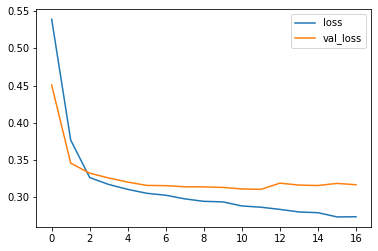

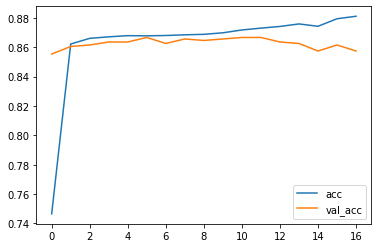

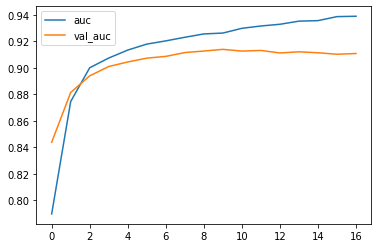

1083/1083 [==============================] - 1s 718us/sample - loss: 0.3085 - tp: 305.0000 - fp: 20.0000 - tn: 637.0000 - fn: 121.0000 - accuracy: 0.8698 - precision: 0.9385 - recall: 0.7160 - auc: 0.9116
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5325 - tp: 1278.0000 - fp: 14.0000 - tn: 5301.0000 - fn: 2180.0000 - accuracy: 0.7499 - precision: 0.9892 - recall: 0.3696 - auc: 0.8038 - val_loss: 0.4434 - val_tp: 249.0000 - val_fp: 1.0000 - val_tn: 598.0000 - val_fn: 127.0000 - val_accuracy: 0.8687 - val_precision: 0.9960 - val_recall: 0.6622 - val_auc: 0.8437
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3850 - tp: 2307.0000 - fp: 96.0000 - tn: 5219.0000 - fn: 1151.0000 - accuracy: 0.8579 - precision: 0.9600 - recall: 0.6671 - auc: 0.8625 - val_loss: 0.3546 - val_tp: 257.0000 - val_fp: 9.0000 - val_tn: 590.0000 - val_fn: 119.0000 - val_accuracy: 0.

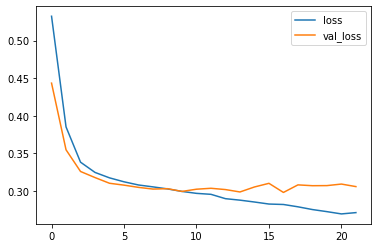

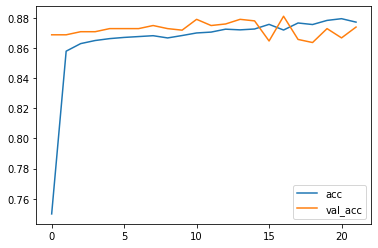

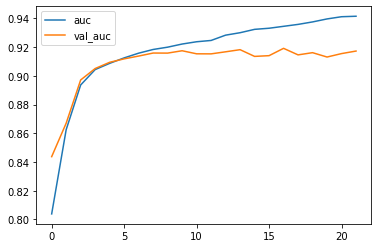

1083/1083 [==============================] - 1s 701us/sample - loss: 0.3104 - tp: 303.0000 - fp: 19.0000 - tn: 638.0000 - fn: 123.0000 - accuracy: 0.8689 - precision: 0.9410 - recall: 0.7113 - auc: 0.9157
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5487 - tp: 1199.0000 - fp: 10.0000 - tn: 5299.0000 - fn: 2265.0000 - accuracy: 0.7407 - precision: 0.9917 - recall: 0.3461 - auc: 0.7840 - val_loss: 0.4447 - val_tp: 233.0000 - val_fp: 0.0000e+00 - val_tn: 605.0000 - val_fn: 137.0000 - val_accuracy: 0.8595 - val_precision: 1.0000 - val_recall: 0.6297 - val_auc: 0.8439
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3749 - tp: 2324.0000 - fp: 149.0000 - tn: 5160.0000 - fn: 1140.0000 - accuracy: 0.8531 - precision: 0.9397 - recall: 0.6709 - auc: 0.8685 - val_loss: 0.3557 - val_tp: 242.0000 - val_fp: 6.0000 - val_tn: 599.0000 - val_fn: 128.0000 - val_accurac

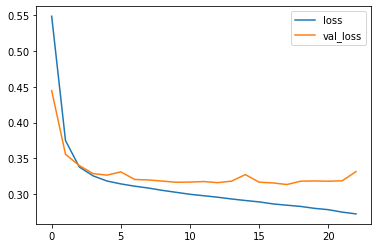

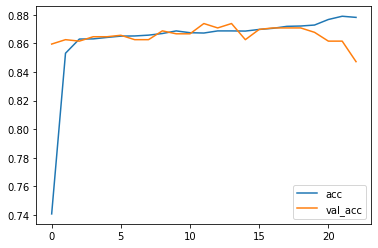

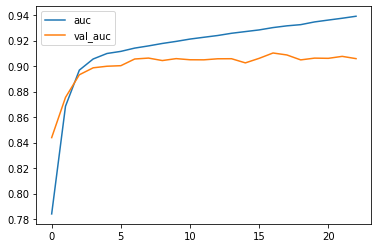

1083/1083 [==============================] - 1s 715us/sample - loss: 0.3091 - tp: 310.0000 - fp: 16.0000 - tn: 641.0000 - fn: 116.0000 - accuracy: 0.8781 - precision: 0.9509 - recall: 0.7277 - auc: 0.9082
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5487 - tp: 1149.0000 - fp: 119.0000 - tn: 5196.0000 - fn: 2309.0000 - accuracy: 0.7232 - precision: 0.9062 - recall: 0.3323 - auc: 0.7757 - val_loss: 0.4511 - val_tp: 233.0000 - val_fp: 2.0000 - val_tn: 597.0000 - val_fn: 143.0000 - val_accuracy: 0.8513 - val_precision: 0.9915 - val_recall: 0.6197 - val_auc: 0.8537
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3832 - tp: 2302.0000 - fp: 95.0000 - tn: 5220.0000 - fn: 1156.0000 - accuracy: 0.8574 - precision: 0.9604 - recall: 0.6657 - auc: 0.8621 - val_loss: 0.3457 - val_tp: 252.0000 - val_fp: 6.0000 - val_tn: 593.0000 - val_fn: 124.0000 - val_accuracy: 0

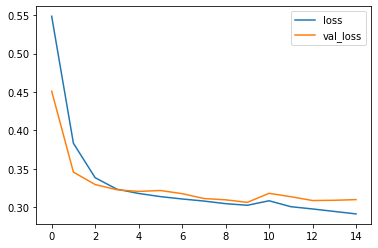

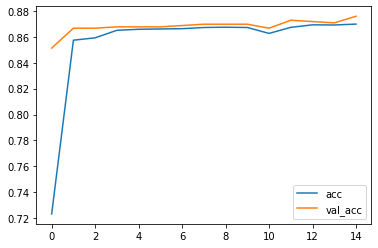

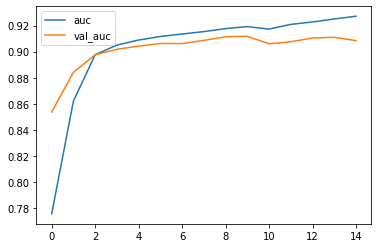

1083/1083 [==============================] - 1s 704us/sample - loss: 0.3295 - tp: 280.0000 - fp: 1.0000 - tn: 656.0000 - fn: 146.0000 - accuracy: 0.8643 - precision: 0.9964 - recall: 0.6573 - auc: 0.8995
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5517 - tp: 1350.0000 - fp: 388.0000 - tn: 4908.0000 - fn: 2127.0000 - accuracy: 0.7133 - precision: 0.7768 - recall: 0.3883 - auc: 0.7673 - val_loss: 0.4428 - val_tp: 199.0000 - val_fp: 1.0000 - val_tn: 617.0000 - val_fn: 158.0000 - val_accuracy: 0.8369 - val_precision: 0.9950 - val_recall: 0.5574 - val_auc: 0.8287
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3766 - tp: 2289.0000 - fp: 30.0000 - tn: 5266.0000 - fn: 1188.0000 - accuracy: 0.8612 - precision: 0.9871 - recall: 0.6583 - auc: 0.8687 - val_loss: 0.3474 - val_tp: 230.0000 - val_fp: 2.0000 - val_tn: 616.0000 - val_fn: 127.0000 - val_accuracy: 0.

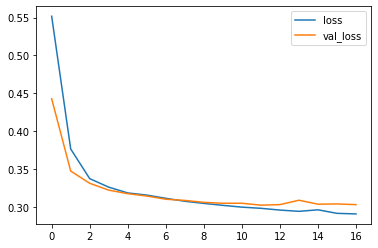

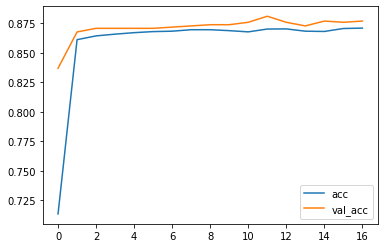

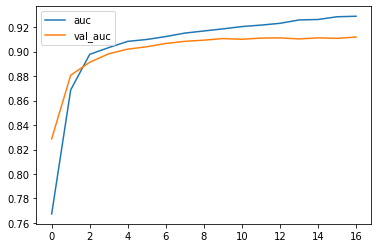

1083/1083 [==============================] - 1s 714us/sample - loss: 0.3075 - tp: 283.0000 - fp: 11.0000 - tn: 646.0000 - fn: 143.0000 - accuracy: 0.8578 - precision: 0.9626 - recall: 0.6643 - auc: 0.9198
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 17s 2ms/sample - loss: 0.5434 - tp: 1285.0000 - fp: 39.0000 - tn: 5276.0000 - fn: 2173.0000 - accuracy: 0.7479 - precision: 0.9705 - recall: 0.3716 - auc: 0.7880 - val_loss: 0.4481 - val_tp: 240.0000 - val_fp: 4.0000 - val_tn: 595.0000 - val_fn: 136.0000 - val_accuracy: 0.8564 - val_precision: 0.9836 - val_recall: 0.6383 - val_auc: 0.8291
Epoch 2/1000
8773/8773 [==============================] - 12s 1ms/sample - loss: 0.3583 - tp: 2301.0000 - fp: 22.0000 - tn: 5293.0000 - fn: 1157.0000 - accuracy: 0.8656 - precision: 0.9905 - recall: 0.6654 - auc: 0.8807 - val_loss: 0.3551 - val_tp: 236.0000 - val_fp: 0.0000e+00 - val_tn: 599.0000 - val_fn: 140.0000 - val_accuracy

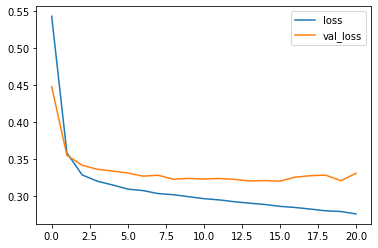

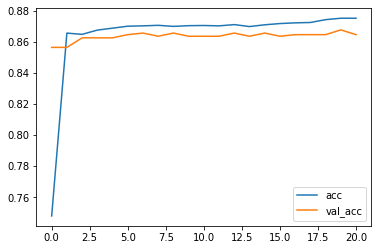

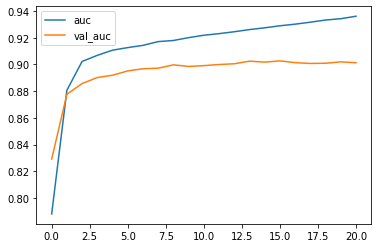

1083/1083 [==============================] - 1s 793us/sample - loss: 0.3209 - tp: 279.0000 - fp: 4.0000 - tn: 653.0000 - fn: 147.0000 - accuracy: 0.8606 - precision: 0.9859 - recall: 0.6549 - auc: 0.9102


In [40]:
# some configuration
VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 32   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.0001
N_SPLITS = 10

print('Building Bi-LSTM model...')
kfold = StratifiedKFold(n_splits=N_SPLITS , shuffle=True, random_state = 7)
cvscores_att = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'auc'])
labels = data_cleaned['relevance'].values
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

embedding_layer = tf.keras.layers.Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

for train, test in kfold.split(texts, labels):

  input_ = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = embedding_layer(input_)
  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(x)
  att_out = attention()(x)
  #x = tf.keras.layers.Dense(32, activation='relu')(att_out)
  output = tf.keras.layers.Dense(1, activation='sigmoid')(att_out)
  
  model = tf.keras.models.Model(input_, output)

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )


# Training model:
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

# fit model
  print('Training model...')
  r = model.fit(
    texts[train],
    labels[train],
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
  )

  model.summary()

# plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

# accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

# auc
  plt.plot(r.history['auc'], label='auc')
  plt.plot(r.history['val_auc'], label='val_auc')
  plt.legend()
  plt.show()

  scores = model.evaluate(x = texts[test], y = labels[test])
  cvscores_att = cvscores_att.append({'tp': scores[1], 'fp': scores[2], 'tn': scores[3], 'fn': scores[4], 'accuracy': scores[5],'precision': scores[6], 'recall': scores[7], 'auc': scores[8]}, ignore_index=True)

In [41]:
cvscores_att

,tp,fp,tn,fn,accuracy,precision,recall,auc
0,316.0,34.0,624.0,110.0,0.867159,0.902857,0.741784,0.932203
1,279.0,13.0,644.0,147.0,0.852262,0.955479,0.654930,0.903109
2,288.0,10.0,647.0,138.0,0.863343,0.966443,0.676056,0.908101
3,294.0,1.0,656.0,132.0,0.877193,0.996610,0.690141,0.921412
4,305.0,20.0,637.0,121.0,0.869806,0.938462,0.715962,0.911577
5,303.0,19.0,638.0,123.0,0.868883,0.940994,0.711268,0.915732
6,310.0,16.0,641.0,116.0,0.878116,0.950920,0.727700,0.908245
7,280.0,1.0,656.0,146.0,0.864266,0.996441,0.657277,0.899470
8,283.0,11.0,646.0,143.0,0.857802,0.962585,0.664319,0.919754
9,279.0,4.0,653.0,147.0,0.860572,0.985866,0.654930,0.910244


In [42]:
cvscores_att.mean(axis = 0)

tp           293.700000
fp            12.900000
tn           644.200000
fn           132.300000
accuracy       0.865940
precision      0.959666
recall         0.689437
auc            0.912985
dtype: float64

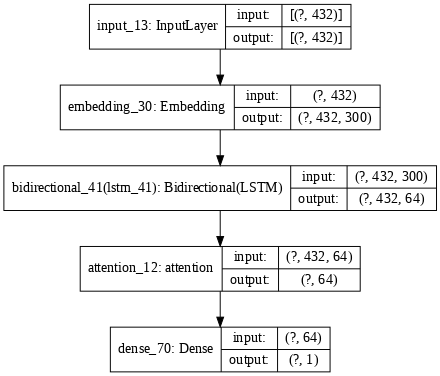

In [43]:
plot_model(model, to_file='model_plot_1.png', show_shapes=True, show_layer_names=True, dpi = 70)

# Sentiment Analysis

## Data Augmentation

In [0]:
# import cleaned data
data = pd.read_csv('/gdrive/My Drive/cleaned_data.csv')
data_s = data[['texts','positivity']][data['relevance']==1]

In [0]:
# use the function in Oversampling
def oversample(wordlist, pos): 
  new_words = wordlist
  for i in range(len(wordlist)):
    for random_word in wordlist[wordlist.index[i]]:
      try:
        synonyms = get_synonyms(random_word)
        synonym = random.choice(list(synonyms))
        new_words[new_words.index[i]] = [synonym if word == random_word else word for word in new_words[new_words.index[i]]]
      except:
        pass
    s = ' '.join(new_words[new_words.index[i]])
    new_words[new_words.index[i]] = s
  augmented_sentences = pd.DataFrame(columns=['texts','positivity'])
  augmented_sentences['texts'] = new_words
  augmented_sentences['positivity']  = pos
  return augmented_sentences

In [53]:
sentence = data_s['texts']
pos = data_s['positivity']
word_list = sentence.str.split()

random.seed(55)
data_s = data_s.append(oversample(word_list, pos))
data_s.reset_index()

,index,texts,positivity
0,0,yield cd fall late week new york yield cert...,3.0
1,4,currency trading dollar remain tight range a...,3.0
2,5,stock fall bofa alcoa slide stock decline ...,3.0
3,9,u s dollar fall currency decline soften bo...,4.0
4,12,defend deflation author james b stewartthe...,4.0
...,...,...,...
2835,7964,livingaccommodations jump maturate upgrade pom...,7.0
2836,7965,lucre evasive stemma marketplace taunt greer h...,3.0
2837,7975,aymalomon phone leery mention thriftiness illi...,8.0
2838,7978,notbad threat monolithic newfangled chronicle ...,5.0


## Baselines - Naive Bayes and SVM

In [0]:
texts = data_s['texts'].values
labels = data_s['positivity'].values

# Linear SVC Model:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state = 7)
acc_svm = pd.DataFrame(columns = ['accuracy'])

for train, test in kfold.split(texts, labels):
# Train both models on the moviereviews.tsv training set:
  text_clf_lsvc.fit(texts[train], labels[train])
  predictions_svm = text_clf_lsvc.predict(texts[test])
  acc_svm = acc_svm.append({'accuracy': metrics.accuracy_score(labels[test], predictions_svm)},  ignore_index=True)
  

In [55]:
acc_svm

,accuracy
0,0.307746
1,0.297887


In [56]:
acc_svm.mean()

accuracy    0.302817
dtype: float64

## Bi-LSTM

In [0]:
# some configuration

MAX_SEQUENCE_LENGTH = 427   # max sentence length 427 words
EMBEDDING_DIM = 300    # word vector dimension

### Word Embedding Weights

In [58]:
# T: number of obersavatons in dataset

# load in pre-trained word vectors
# size: MAX_VOCAB_SIZE x word vector dimension
MAX_VOCAB_SIZE = 50000     # how many words will be used from dictionary 

print('Loading word vectors...')
word2vec = glove_embeddings

# load dataset
sentences = data_s['texts'].fillna("DUMMY_VALUE").values

# convert the sentences (strings) into integers
# return a list of the index of every word in every sentence
num_words = MAX_VOCAB_SIZE
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(sentences)   # word counts on unique words, see below

# get word -> integer mapping
# word2idx: number of unique words with index (Dictionary of word index)
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Loading word vectors...
Found 22228 unique tokens.


In [59]:
# prepare embedding matrix
# use the word and index in word2idx to look for the word vector (numeric)
# embedding_matrix
# size: # of unique words x D
n = 0
uncovered_words = {}
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE,len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = word2vec.get(word)
        #print(embedding_vector)
        if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
            embedding_matrix[i] = embedding_vector
        else:
            n = n + 1
            uncovered_words[n] = word
print('{}, or {:.2%} of total {} unique words are not covered'.format(n, n/len(word2idx), len(word2idx)))

Filling pre-trained embeddings...
4486, or 20.18% of total 22228 unique words are not covered


### Padding

In [60]:
sequences = tokenizer.texts_to_sequences(data_s['texts'].values)  # list, size T x number of words in each line (each line fluctuates)
texts = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of test data tensor:', texts.shape)

Shape of test data tensor: (2840, 427)


### Model

#### Bi-LSTM

Building Bi-LSTM model...
Training model...
Train on 1278 samples, validate on 142 samples
Epoch 1/1000
1278/1278 [==============================] - 44s 35ms/sample - loss: 0.3492 - accuracy: 0.8735 - auc: 0.6865 - val_loss: 0.3464 - val_accuracy: 0.8750 - val_auc: 0.6906
Epoch 2/1000
1278/1278 [==============================] - 41s 32ms/sample - loss: 0.3400 - accuracy: 0.8750 - auc: 0.7053 - val_loss: 0.3440 - val_accuracy: 0.8750 - val_auc: 0.7011
Epoch 3/1000
1278/1278 [==============================] - 41s 32ms/sample - loss: 0.3360 - accuracy: 0.8750 - auc: 0.7245 - val_loss: 0.3462 - val_accuracy: 0.8750 - val_auc: 0.6999
Epoch 4/1000
1278/1278 [==============================] - 42s 33ms/sample - loss: 0.3294 - accuracy: 0.8750 - auc: 0.7487 - val_loss: 0.3440 - val_accuracy: 0.8750 - val_auc: 0.7100
Epoch 5/1000
1278/1278 [==============================] - 41s 32ms/sample - loss: 0.3208 - accuracy: 0.8749 - auc: 0.7734 - val_loss: 0.3453 - val_accuracy: 0.8750 - val_auc: 0.6926

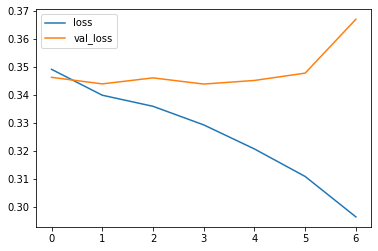

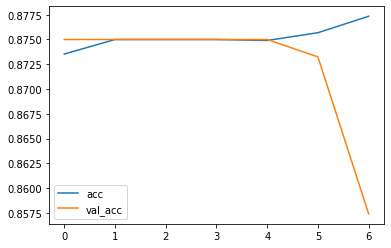

1420/1420 [==============================] - 2s 1ms/sample - loss: 0.3325 - accuracy: 0.8751 - auc: 0.7418
Training model...
Train on 1278 samples, validate on 142 samples
Epoch 1/1000
1278/1278 [==============================] - 44s 35ms/sample - loss: 0.3455 - accuracy: 0.8728 - auc: 0.6999 - val_loss: 0.3673 - val_accuracy: 0.8750 - val_auc: 0.6474
Epoch 2/1000
1278/1278 [==============================] - 41s 32ms/sample - loss: 0.3340 - accuracy: 0.8750 - auc: 0.7213 - val_loss: 0.3756 - val_accuracy: 0.8750 - val_auc: 0.6514
Epoch 3/1000
1278/1278 [==============================] - 41s 32ms/sample - loss: 0.3305 - accuracy: 0.8752 - auc: 0.7370 - val_loss: 0.3760 - val_accuracy: 0.8750 - val_auc: 0.6292
Epoch 4/1000
1278/1278 [==============================] - 41s 32ms/sample - loss: 0.3279 - accuracy: 0.8749 - auc: 0.7477 - val_loss: 0.3658 - val_accuracy: 0.8750 - val_auc: 0.6493
Epoch 5/1000
1278/1278 [==============================] - 41s 32ms/sample - loss: 0.3199 - accuracy:

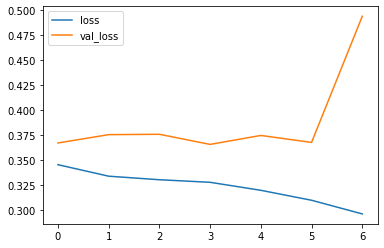

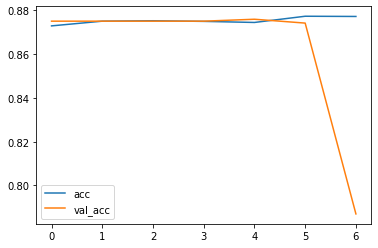

1420/1420 [==============================] - 2s 1ms/sample - loss: 0.3401 - accuracy: 0.8750 - auc: 0.7078


In [61]:
# some configuration
oov_tok = "<OOV>"
trunc_type='post'
padding_type='post'

VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 1   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.001
N_SPLITS = 2

kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state = 7)
cvscores_s = pd.DataFrame(columns = ['accuracy', 'auc'])
labels = data_s['positivity'].values

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
]


print('Building Bi-LSTM model...')
for train, test in kfold.split(texts, labels):

  labels_train = pd.get_dummies(labels[train])
  labels_test = pd.get_dummies(labels[test])
  m = sum(labels_train.columns)-sum(labels_test.columns)
  listofzeros = [0] * len(labels_test)
  if m > 0:
    labels_test[m] = listofzeros
  elif m < 0:
    labels_train[-m] = listofzeros

  model = tf.keras.Sequential([
      #Embedding

       tf.keras.layers.Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix], trainable=False),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
       #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(8, activation='sigmoid')
  ])

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )

  # Training model:
  # parameters: batch_size, epoches
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
  #mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  # fit model
  # load a saved model


  print('Training model...')
  r = model.fit(
  texts[train],
    labels_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
    #callbacks=[es, mc]
    ##class_weight = class_weight_dict
    #use_multiprocessing=True
  )

  #saved_model = tf.keras.models.load_model('best_model.h5')
  #saved_model.summary()
  model.summary()

  # plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

  # accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

  scores = model.evaluate(x = texts[test], y = labels_test)
  cvscores_s = cvscores_s.append({'accuracy': scores[1], 'auc': scores[2]}, ignore_index=True)

In [62]:
cvscores_s

,accuracy,auc
0,0.875088,0.741771
1,0.875000,0.707766


In [63]:
cvscores_s.mean()

accuracy    0.875044
auc         0.724769
dtype: float64

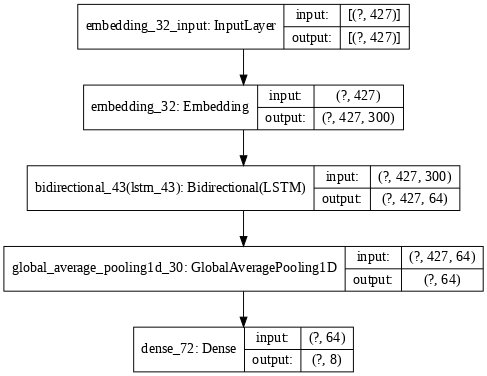

In [64]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot_1.png', show_shapes=True, show_layer_names=True, dpi = 70)

#### Bi-LSTM + Attention

Building Bi-LSTM model...
Training model...
Train on 1278 samples, validate on 142 samples
Epoch 1/1000
1278/1278 [==============================] - 45s 35ms/sample - loss: 0.3504 - accuracy: 0.8737 - auc: 0.6849 - val_loss: 0.3490 - val_accuracy: 0.8750 - val_auc: 0.6701
Epoch 2/1000
1278/1278 [==============================] - 42s 33ms/sample - loss: 0.3375 - accuracy: 0.8750 - auc: 0.7173 - val_loss: 0.3460 - val_accuracy: 0.8750 - val_auc: 0.7016
Epoch 3/1000
1278/1278 [==============================] - 42s 33ms/sample - loss: 0.3291 - accuracy: 0.8751 - auc: 0.7490 - val_loss: 0.3427 - val_accuracy: 0.8750 - val_auc: 0.6961
Epoch 4/1000
1278/1278 [==============================] - 42s 33ms/sample - loss: 0.3103 - accuracy: 0.8769 - auc: 0.7964 - val_loss: 0.3467 - val_accuracy: 0.8750 - val_auc: 0.7014
Epoch 5/1000
1278/1278 [==============================] - 41s 32ms/sample - loss: 0.2865 - accuracy: 0.8838 - auc: 0.8395 - val_loss: 0.3576 - val_accuracy: 0.8627 - val_auc: 0.7151

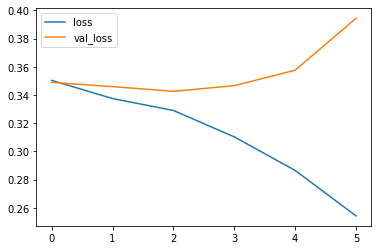

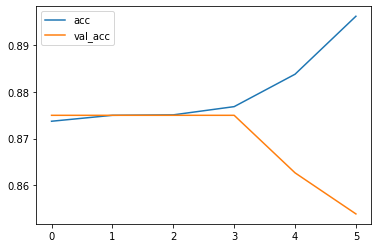

1420/1420 [==============================] - 2s 1ms/sample - loss: 0.3340 - accuracy: 0.8750 - auc: 0.7278
Training model...
Train on 1278 samples, validate on 142 samples
Epoch 1/1000
1278/1278 [==============================] - 44s 35ms/sample - loss: 0.3452 - accuracy: 0.8725 - auc: 0.6995 - val_loss: 0.3599 - val_accuracy: 0.8750 - val_auc: 0.6665
Epoch 2/1000
1278/1278 [==============================] - 41s 32ms/sample - loss: 0.3329 - accuracy: 0.8750 - auc: 0.7279 - val_loss: 0.3681 - val_accuracy: 0.8750 - val_auc: 0.6516
Epoch 3/1000
1278/1278 [==============================] - 40s 31ms/sample - loss: 0.3260 - accuracy: 0.8750 - auc: 0.7532 - val_loss: 0.3703 - val_accuracy: 0.8750 - val_auc: 0.6547
Epoch 4/1000
1278/1278 [==============================] - 40s 32ms/sample - loss: 0.3112 - accuracy: 0.8754 - auc: 0.7945 - val_loss: 0.3670 - val_accuracy: 0.8715 - val_auc: 0.6587
Epoch 00004: early stopping
Model: "model_14"
______________________________________________________

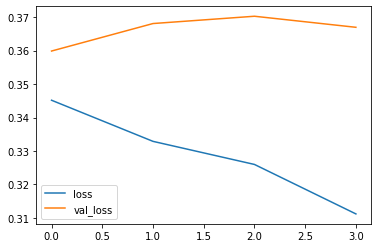

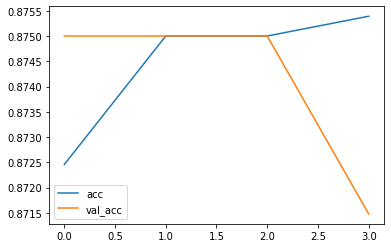

1420/1420 [==============================] - 2s 1ms/sample - loss: 0.3385 - accuracy: 0.8750 - auc: 0.7141


In [65]:
class attention(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

# some configuration
oov_tok = "<OOV>"
trunc_type='post'
padding_type='post'

VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 1   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.001
N_SPLITS = 2

kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state = 7)
cvscores_s = pd.DataFrame(columns = ['accuracy', 'auc'])
labels = data_s['positivity'].values

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
]

embedding_layer = tf.keras.layers.Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

print('Building Bi-LSTM model...')
for train, test in kfold.split(texts, labels):

  labels_train = pd.get_dummies(labels[train])
  labels_test = pd.get_dummies(labels[test])
  m = sum(labels_train.columns)-sum(labels_test.columns)
  listofzeros = [0] * len(labels_test)
  if m > 0:
    labels_test[m] = listofzeros
  elif m < 0:
    labels_train[-m] = listofzeros

  input_ = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = embedding_layer(input_)
  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(x)
  att_out = attention()(x)
  output = tf.keras.layers.Dense(8, activation='sigmoid')(att_out)

  model = tf.keras.models.Model(input_, output)


  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )

  # Training model:
  # parameters: batch_size, epoches
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
  #mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  # fit model
  # load a saved model


  print('Training model...')
  r = model.fit(
  texts[train],
    labels_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
    #callbacks=[es, mc]
    ##class_weight = class_weight_dict
    #use_multiprocessing=True
  )

  #saved_model = tf.keras.models.load_model('best_model.h5')
  #saved_model.summary()
  model.summary()

  # plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

  # accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

  scores = model.evaluate(x = texts[test], y = labels_test)
  cvscores_s = cvscores_s.append({'accuracy': scores[1], 'auc': scores[2]}, ignore_index=True)

In [0]:
cvscores_s

,accuracy,auc
0,0.875000,0.721341
1,0.875616,0.734566


In [66]:
cvscores_s.mean()

accuracy    0.875000
auc         0.720974
dtype: float64

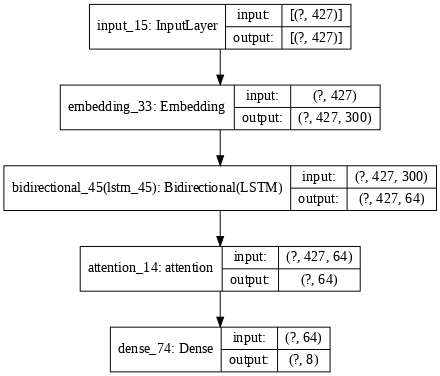

In [67]:
plot_model(model, to_file='model_plot_2.png', show_shapes=True, show_layer_names=True, dpi = 70)